# Imports and variables

In [21]:
import pickle
import numpy as np
import os
import pandas as pd
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
import seaborn as sns

from src.results import get_panel_data, get_best_scores_table, get_scores_skills_table

In [2]:
ens_method = "rand_init"
ens_method_ls = [
    "rand_init",
    "bagging",
    "batchensemble",
    "bayesian",
    "mc_dropout",
    "variational_dropout",
    "concrete_dropout",
]
ens_method_labels = {
    "rand_init": "Naive",
    "bagging": "Bagging",
    "batchensemble": "BatchEns.",
    "bayesian": "Bayesian",
    "mc_dropout": "MC Dropout",
    "variational_dropout": "Var. Drop.",
    "concrete_dropout": "Conc. Drop.",
}
dataset_ls = [
    "boston",
    "concrete",
    "energy",
    "kin8nm",
    "naval",
    "power",
    "protein",
    "wine",
    "yacht",
]
dataset_labels = {
    "boston": "Boston Housing \n (N=506)",
    "concrete": "Concrete Strength \n (N=1030)",
    "energy": "Energy Efficiency \n (N=768)",
    "kin8nm": "Kin8nm \n (N=8192)",
    "naval": "Naval Propulsion \n (N=11934)",
    "power": "Power Plant \n (N=9568)",
    "protein": "Protein Structure \n (N=45730)",
    "wine": "Wine Quality Red \n (N=1599)",
    "yacht": "Yacht Hydrodynamics \n (N=308)"
}
agg_labels = {
    "lp": r"$LP$",
    "vi": r"$V_0^=$",
    "vi-a": r"$V_a^=$",
    "vi-w": r"$V_0^w$",
    "vi-aw": r"$V_a^w$",
}

In [3]:
# Get colors
agg_cols = sns.color_palette("Dark2", 8, as_cmap=True)
# Colors of aggregation methods
agg_col = {
    "lp": agg_cols.colors[4],  # type: ignore
    "vi": agg_cols.colors[5],  # type: ignore
    "vi-a": agg_cols.colors[2],  # type: ignore
    "vi-w": agg_cols.colors[0],  # type: ignore
    "vi-aw": agg_cols.colors[3],  # type: ignore
    "ens": agg_cols.colors[7],  # type: ignore
    "opt": agg_cols.colors[1],  # type: ignore
}

greens = sns.color_palette("Greens", 2, as_cmap=False)
blues = sns.color_palette("Blues", 1)
purples = sns.color_palette("Purples", 1)
reds = sns.color_palette("Reds", 3)
ens_col = {
    "rand_init": greens[1], #multi_model_cols.colors[0],  # type: ignore
    "bagging": greens[0], #multi_model_cols.colors[1],  # type: ignore
    "batchensemble": blues[0], #multi_model_cols.colors[3],  # type: ignore
    "bayesian": purples[0], #multi_model_cols.colors[8],  # type: ignore
    "mc_dropout": reds[2], #dropout_cols.colors[14],  # type: ignore
    "variational_dropout": reds[1], #dropout_cols.colors[16],  # type: ignore
    "concrete_dropout": reds[0], #dropout_cols.colors[15],  # type: ignore
}

# KIT colors
kit_cols_dict = {
    "green": "#00876C",
    "blue": "#4664AA",
    "black": "#000000",
    "grey": "#404040",
}

In [4]:
score_vec = ["crps", "crpss", "me", "lgt", "cov", "a", "w"]
nn_vec = ["drn", "bqn"]
n_ens_vec = np.arange(start=2, stop=10 + 2, step=2)
agg_meths = ["lp", "vi", "vi-a", "vi-w", "vi-aw"]

In [5]:
export = True
save_dir = os.path.join("plots", "results")

# Get score and skill data

In [6]:
# Get skills table
data_path = os.path.join("..", "..", "04_Experiments", f"Normal")
df_scores, df_skills = get_scores_skills_table(data_path, dataset_ls, score_vec, nn_vec, n_ens_vec, agg_meths, ens_method_ls)

# Add skill difference columns
for idx in range(len(n_ens_vec)):
    if idx == 0:
        continue
    n_ens = n_ens_vec[idx]
    n_ens_prev = n_ens_vec[idx-1]
    df_skills[f"diff_skill_{n_ens}"] = df_skills[f"skill_{n_ens}"] - df_skills[f"skill_{n_ens_prev}"]

df_skills.head()

ens_method dataset   nn    agg   skill_2   skill_4   skill_6   skill_8  \
0  rand_init  boston  drn     lp  0.289200  0.215500  0.582567  0.105138   
1  rand_init  boston  drn     vi  0.275882  0.322590  0.413210  0.408691   
2  rand_init  boston  drn   vi-a -0.478778 -0.475159 -0.386170 -0.379353   
3  rand_init  boston  drn   vi-w -0.600923 -0.582863 -0.499349 -0.495916   
4  rand_init  boston  drn  vi-aw -0.849472 -0.867536 -0.835119 -0.829590   

   skill_10  avg_skill  diff_skill_4  diff_skill_6  diff_skill_8  \
0  0.284955   0.295472     -0.073700      0.367067     -0.477429   
1  0.419660   0.368007      0.046708      0.090620     -0.004519   
2 -0.371357  -0.418163      0.003618      0.088989      0.006817   
3 -0.486431  -0.533096      0.018060      0.083515      0.003432   
4 -0.808123  -0.837968     -0.018064      0.032418      0.005529   

   diff_skill_10  
0       0.179817  
1       0.010969  
2       0.007996  
3       0.009485  
4       0.021467

In [7]:
df_scores.head()

ens_method dataset   nn    agg   score_2   score_4   score_6   score_8  \
0  rand_init  boston  drn     lp  1.880196  1.882215  1.874762  1.884769   
1  rand_init  boston  drn     vi  1.880447  1.880195  1.877956  1.879042   
2  rand_init  boston  drn   vi-a  1.894677  1.895243  1.893030  1.893910   
3  rand_init  boston  drn   vi-w  1.896980  1.897274  1.895165  1.896109   
4  rand_init  boston  drn  vi-aw  1.901667  1.902644  1.901496  1.902405   

   score_10  avg_score  
0  1.880862   1.880561  
1  1.878322   1.879192  
2  1.893242   1.894020  
3  1.895413   1.896188  
4  1.901480   1.901939

In [8]:
# Define plot variables
show_outliers = False

# Final plots

## Boxplot - Skill for increasing ensemble size per aggregation method

- Columns: NN type (DRN, BQN)
- Rows: Datasets

Aggregated over:
- Ensemble methods

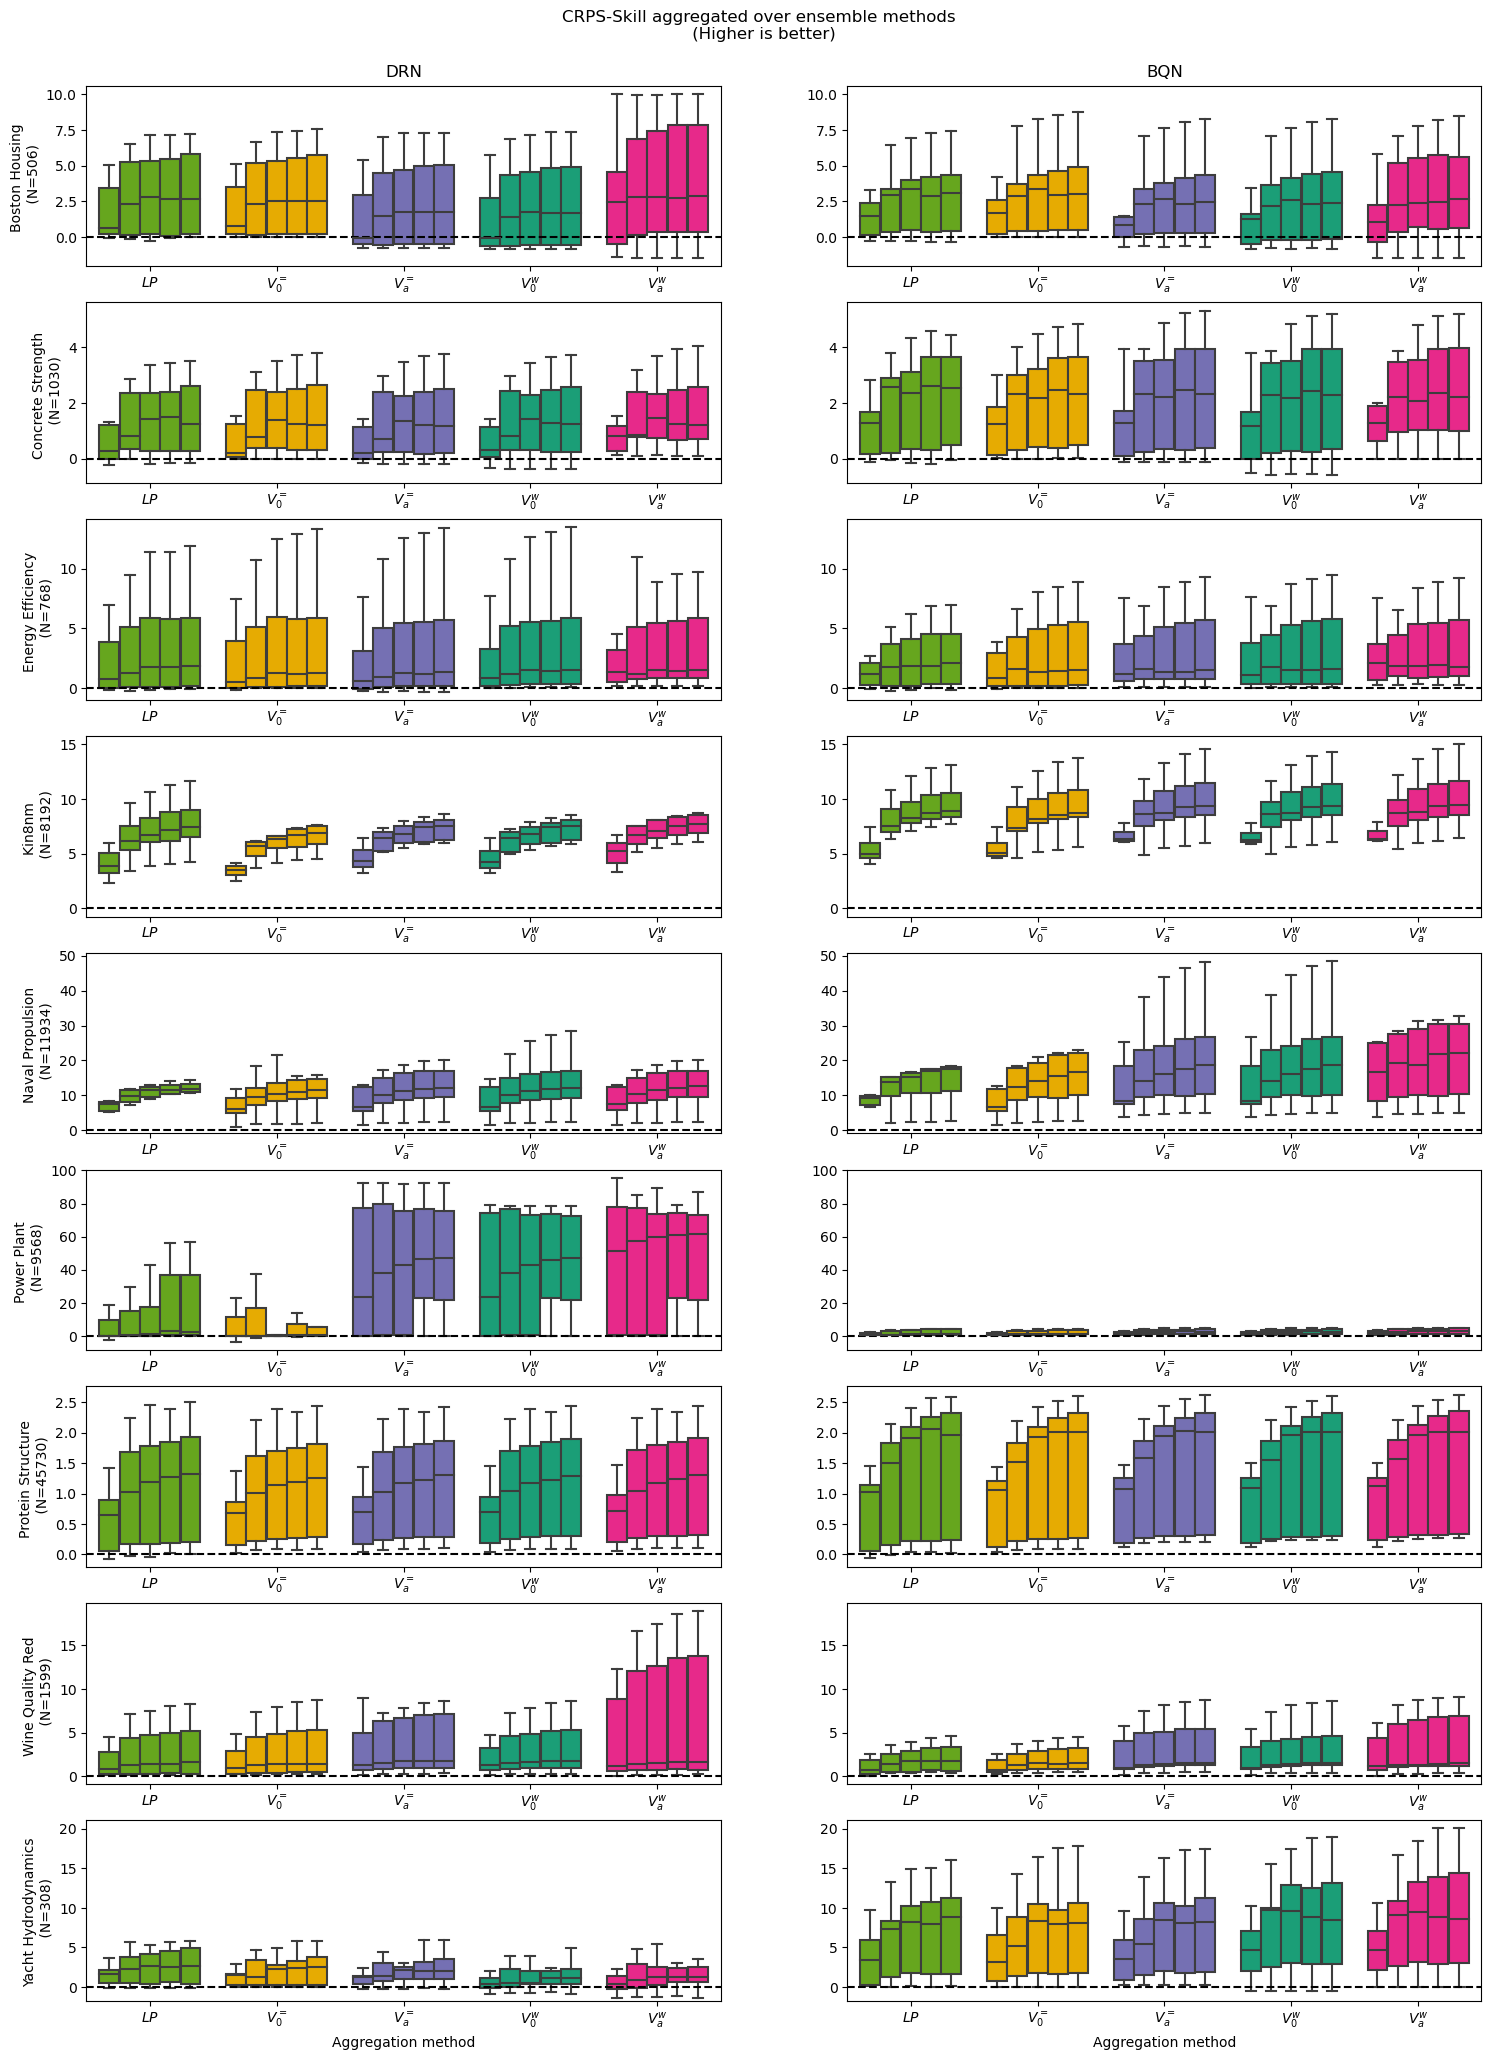

In [41]:
##### Skill - Boxplots - x=aggregation_methods #####

# Create subplots
fig, axs = plt.subplots(nrows=len(dataset_ls), ncols=len(nn_vec), figsize=(18,18*1.4), squeeze=False)

# Iterate over NN types and datasets
for i_nn, nn in enumerate(nn_vec):
    df_nn = df_skills[df_skills["nn"] == nn]
    for i_dataset, dataset in enumerate(dataset_ls):
        df_nn_dataset = df_nn[(df_nn["dataset"] == dataset)]
        # Melt dataframe for sns plots
        df_melt = pd.melt(df_nn_dataset, id_vars=["ens_method", "dataset", "nn", "agg"], var_name="ensemble_size", value_name="skill")
        # Only use skills not differences
        df_final = df_melt[df_melt["ensemble_size"].isin([f"skill_{n_ens}" for n_ens in n_ens_vec])]
        
        # Plot boxplots
        g = sns.boxplot(ax=axs[i_dataset][i_nn], data=df_final,
                 y="skill", x="agg", hue="ensemble_size", showfliers=show_outliers)
        
        # Add 0 line
        g.axhline(0, linestyle="--", color=kit_cols_dict["black"])
        # Add labels to x and y axis
        axs[i_dataset][i_nn].set_ylabel("")
        axs[i_dataset][0].set_ylabel(dataset_labels[dataset])
        axs[i_dataset][i_nn].set_xticklabels([agg_labels.get(agg) for agg in agg_meths])
        axs[i_dataset][i_nn].set_xlabel("")
        axs[len(dataset_ls)-1][i_nn].set_xlabel("Aggregation method")

        # Change color
        boxplots = axs[i_dataset][i_nn].patches
        agg_col_ls = list(agg_col.values())[:5]
        for i, boxplot in enumerate(boxplots[1:len(agg_col_ls)*2:2] + boxplots[len(agg_col_ls)*2:]):  # type: ignore
            boxplot.set_facecolor(agg_col_ls[i//5])

# # Remove subplot legends and add figure legend
for ax in [item for sublist in axs for item in sublist]:
    ax.legend([],[], frameon=False)
handles, labels = axs[0][0].get_legend_handles_labels()

# Set y axis range
for ax_drn, ax_bqn in axs:
    drn_l, drn_u = ax_drn.get_ylim()
    bqn_l, bqn_u = ax_bqn.get_ylim()
    drn_range = drn_u - drn_l
    bqn_range = bqn_u - bqn_l
    
    ax_drn.set_ylim(min(drn_l, bqn_l), max(drn_u, bqn_u))
    ax_bqn.set_ylim(min(drn_l, bqn_l), max(drn_u, bqn_u))

# Set titles and legends
axs[0][0].set_title("DRN")
axs[0][1].set_title("BQN")
fig.subplots_adjust(top=0.87)
fig.suptitle(f"CRPS-Skill aggregated over ensemble methods \n (Higher is better)", y=0.9)

# Save figure
if export:
    if show_outliers:
        filename=os.path.join(save_dir, "01_skill_boxplot_per_agg.pdf")
        fig.savefig(filename, bbox_inches='tight')
        filename=os.path.join(save_dir, "01_skill_boxplot_per_agg.png")
        fig.savefig(filename, bbox_inches='tight')
    else:
        filename=os.path.join(save_dir, "01_skill_boxplot_per_agg_no_outliers.pdf")
        fig.savefig(filename, bbox_inches='tight')
        filename=os.path.join(save_dir, "01_skill_boxplot_per_agg_no_outliers.png")
        fig.savefig(filename, bbox_inches='tight')

## Lineplot - Skill per aggregation and ensemble method

- Columns: Ensemble method
- Rows: Dataset

Aggregated over:

- None

C:\Users\koehl\AppData\Local\Temp\ipykernel_8812\1950789999.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i_dataset][i_ens].set_xticklabels([str(i_ens) for i_ens in n_ens_vec])
C:\Users\koehl\AppData\Local\Temp\ipykernel_8812\1950789999.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i_dataset][i_ens].set_xticklabels([str(i_ens) for i_ens in n_ens_vec])
C:\Users\koehl\AppData\Local\Temp\ipykernel_8812\1950789999.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i_dataset][i_ens].set_xticklabels([str(i_ens) for i_ens in n_ens_vec])
C:\Users\koehl\AppData\Local\Temp\ipykernel_8812\1950789999.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i_dataset][i_ens].set_xticklabels([str(i_ens) for i_ens in n_ens_vec])
C:\Users\koehl\AppData\Local\Temp\ipykernel_8812\1950789999.py:39: UserWarning: FixedFormatter should only be used together 

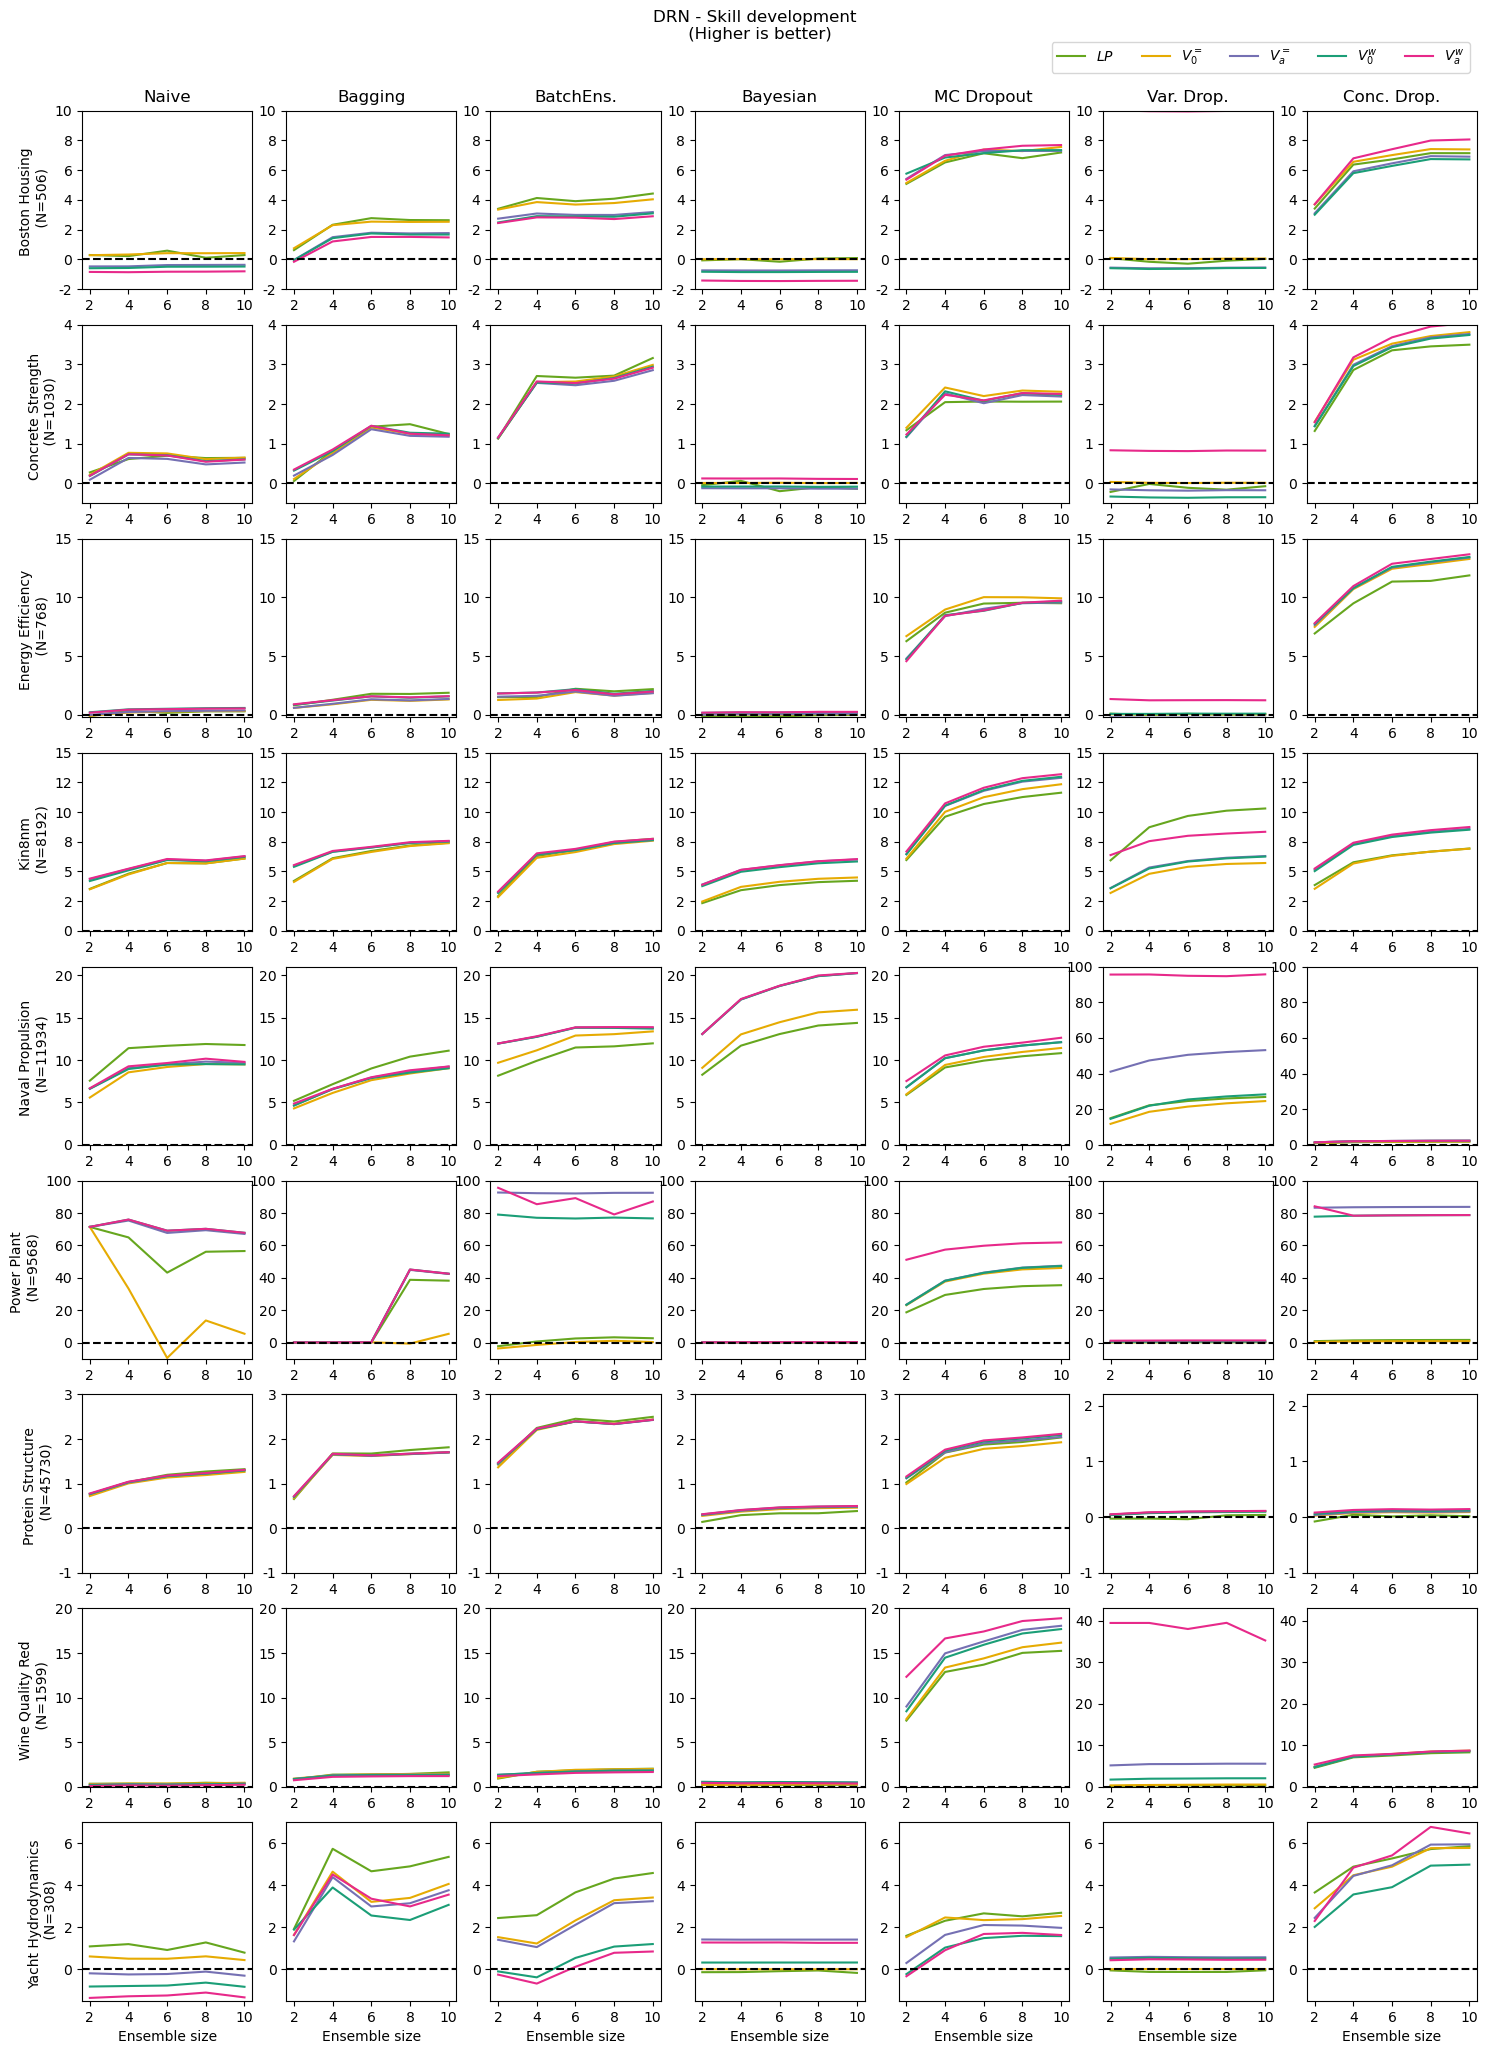

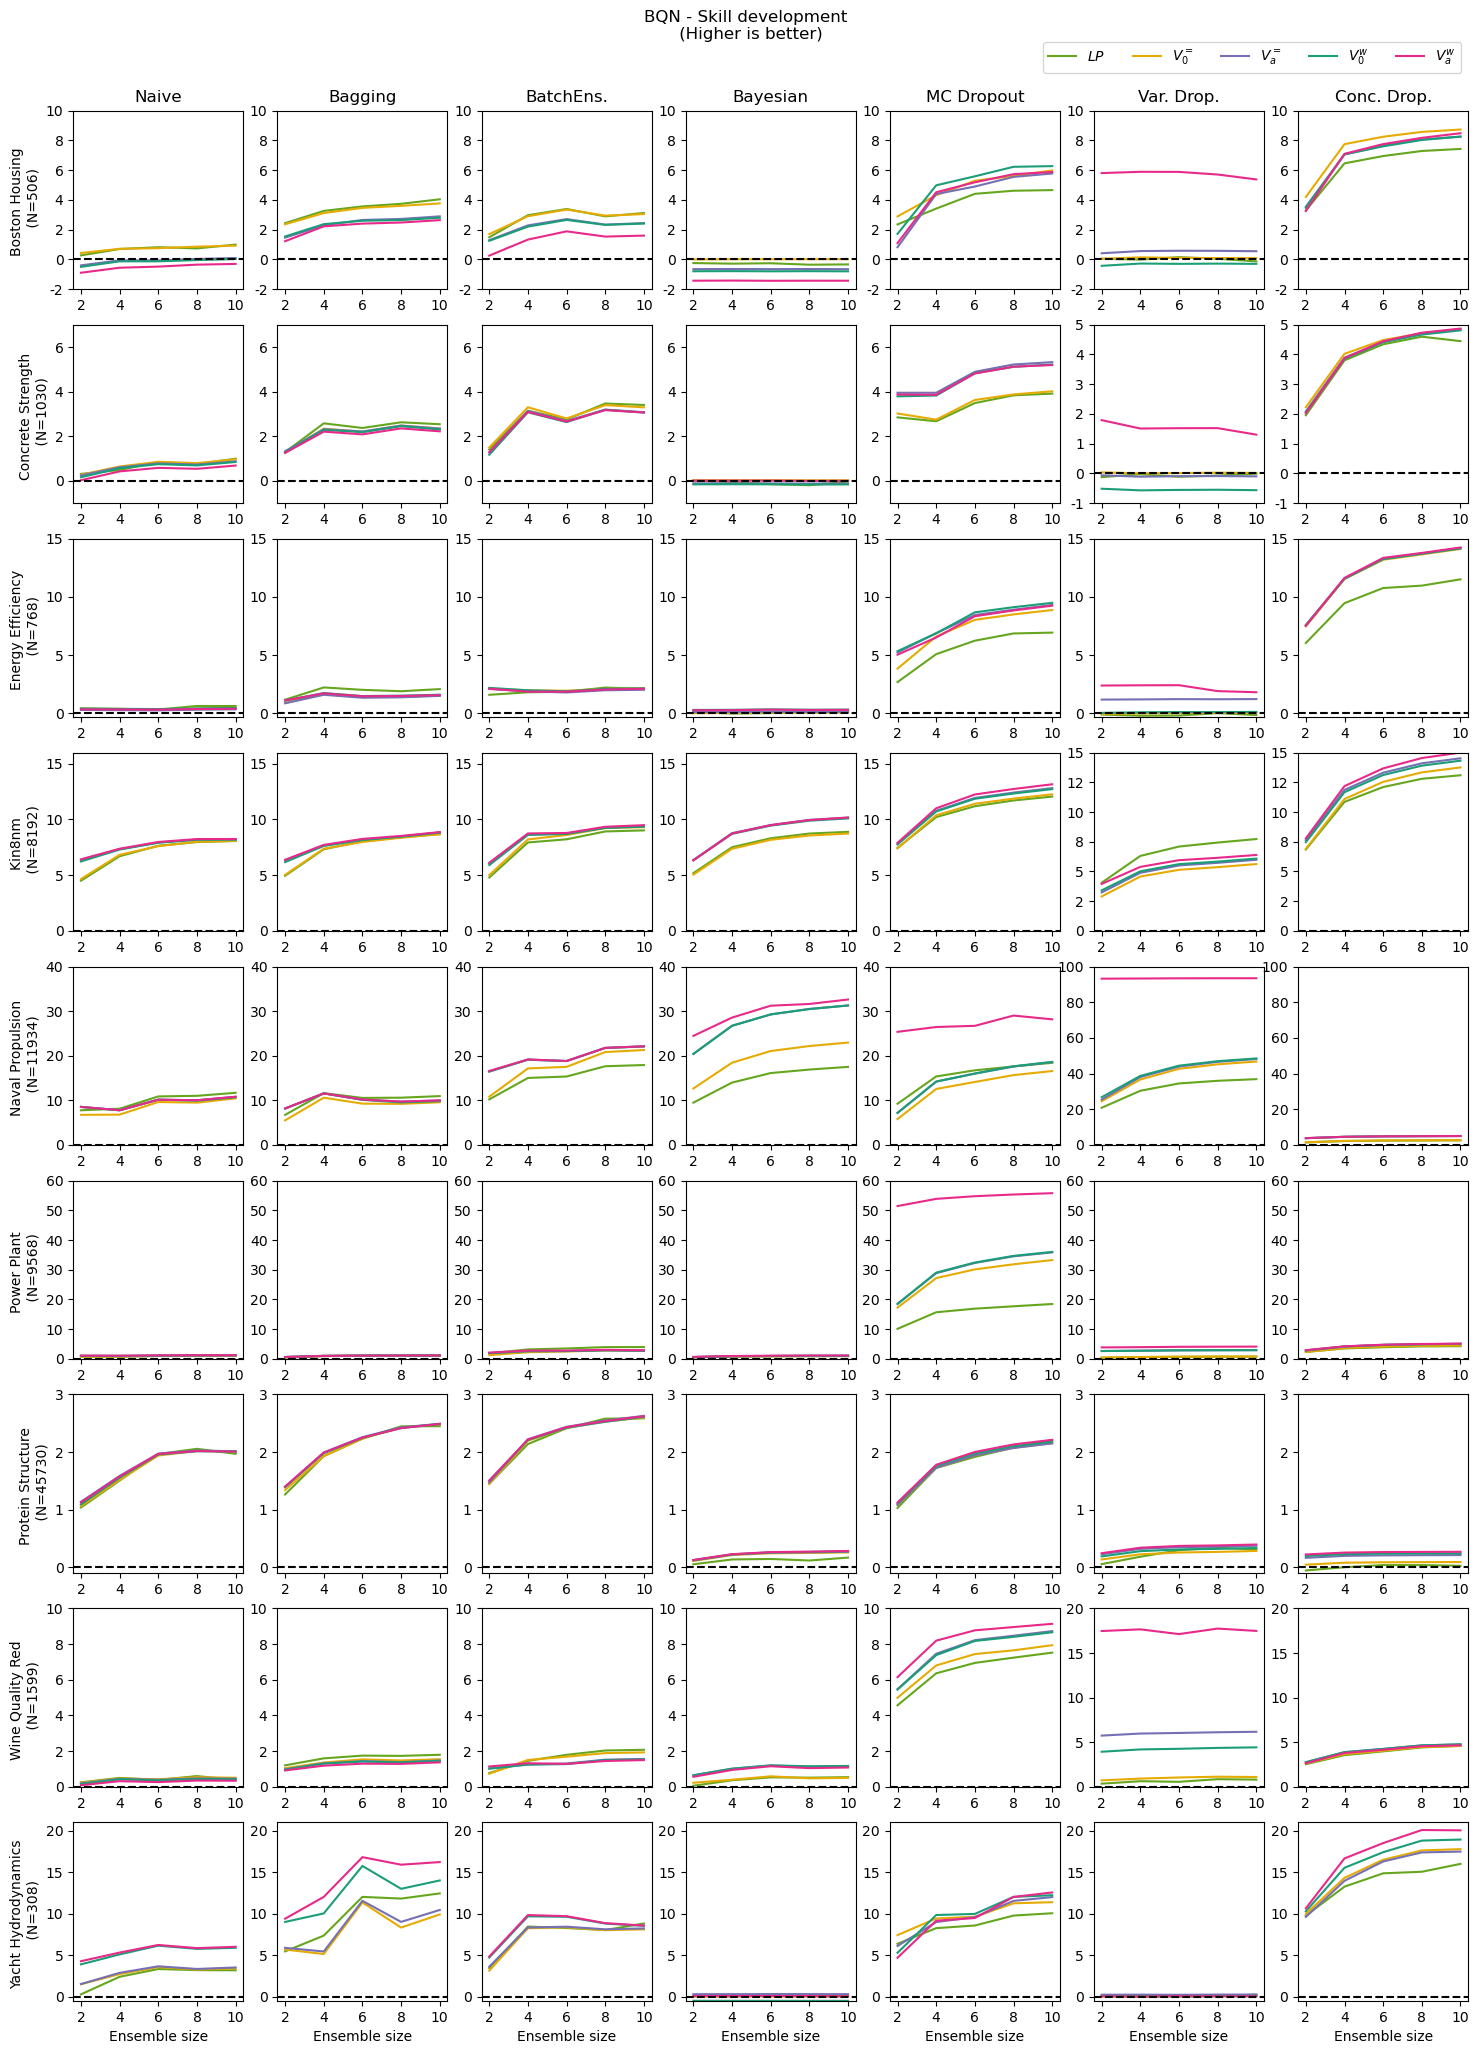

In [28]:
##### Skill - Lineplot - x=ensemble_size - Columns=ensemble_method #####

# Iterate over NN types and datasets
for i_nn, nn in enumerate(nn_vec):
    # Create subplots
    fig, axs = plt.subplots(nrows=len(dataset_ls), ncols=len(ens_method_ls), figsize=(18,18*1.4), squeeze=False)
    df_nn = df_skills[df_skills["nn"] == nn]
    for i_ens, ens_method in enumerate(ens_method_ls):
        df_nn_ens = df_nn[(df_nn["ens_method"] == ens_method)]
        for i_dataset, dataset in enumerate(dataset_ls):
            df_nn_dataset = df_nn_ens[(df_nn_ens["dataset"] == dataset)]
            
            # Melt dataframe for sns plots
            df_melt = pd.melt(df_nn_dataset, id_vars=["ens_method", "dataset", "nn", "agg"], var_name="ensemble_size", value_name="skill")
            # Only use skills not differences
            df_final = df_melt[df_melt["ensemble_size"].isin([f"skill_{n_ens}" for n_ens in n_ens_vec])]
                
            # Plot boxplots
            g = sns.lineplot(ax=axs[i_dataset][i_ens], data=df_final,
                    y="skill", x="ensemble_size", hue="agg", palette=agg_col)
            
            # Add 0 line
            g.axhline(0, linestyle="--", color=kit_cols_dict["black"])
            # Add labels to x and y axis
            axs[i_dataset][i_ens].set_ylabel("")
            axs[i_dataset][0].set_ylabel(dataset_labels[dataset])
            axs[i_dataset][i_ens].yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
            with_ticks = True
            if not with_ticks:
                if i_ens != 0:
                    axs[i_dataset][i_ens].tick_params(axis="both", which="both", left=False, labelleft=False)
                    # axs[i_dataset][i_ens].set_yticklabels("")
                if i_dataset != len(dataset_ls) - 1:
                    # axs[i_dataset][i_ens].set_xticklabels("")
                    axs[i_dataset][i_ens].tick_params(axis="both", which="both", bottom=False, labelbottom=False)
                else:
                    axs[i_dataset][i_ens].set_xticklabels([str(i_ens) for i_ens in n_ens_vec])
            else:
                axs[i_dataset][i_ens].set_xticklabels([str(i_ens) for i_ens in n_ens_vec])
            axs[i_dataset][i_ens].set_xlabel("")
        axs[len(dataset_ls)-1][i_ens].set_xlabel("Ensemble size")

    # Remove subplot legends and add figure legend
    for ax in [item for sublist in axs for item in sublist]:
        ax.legend([],[], frameon=False)

    # Merge subplot legends and displaz figure legend
    handles = []
    labels = []
    for ax in [item for sublist in axs for item in sublist]:
        curr_handles, curr_labels = ax.get_legend_handles_labels()
        for idx, check_label in enumerate(curr_labels):
            if check_label not in labels:
                handles.append(curr_handles[idx])
                labels.append(curr_labels[idx])
        ax.legend([],[], frameon=False)
    labels = [agg_labels.get(agg) for agg in labels]
    fig.legend(handles, labels, bbox_to_anchor=(0.9, 0.89), ncol=len(agg_meths))

    # Set y axis range
    limits = {
        "drn": {
            "boston": [-2, 10],
            "concrete": [-0.5,4],
            "energy": [-0.2, 15],
            "kin8nm": [0, 15],
            "naval": [0, 21],
            "power": [-10, 100],
            "protein": [-1, 3],
            "wine": [0, 20],
            "yacht": [-1.5, 7],
        },
        "bqn": {
            "boston": [-2, 10],
            "concrete": [-1, 7],
            "energy": [-0.3, 15],
            "kin8nm": [0, 16],
            "naval": [0, 40],
            "power": [0, 60],
            "protein": [-0.1, 3],
            "wine": [0, 10],
            "yacht": [-0.5, 21],
        }
    }
    limits_var_dropout = {
        "drn": {
            "boston": [-2, 10],
            "concrete": [-0.5,4],
            "energy": [-0.2, 15],
            "kin8nm": [0, 15],
            "naval": [0, 100],
            "power": [-10, 100],
            "protein": [-1, 2.2],
            "wine": [0, 43],
            "yacht": [-1.5, 7],
        },
        "bqn": {
            "boston": [-2, 10],
            "concrete": [-1, 5],
            "energy": [-0.3, 15],
            "kin8nm": [0, 15],
            "naval": [0, 100],
            "power": [0, 60],
            "protein": [-0.1, 3],
            "wine": [0, 20],
            "yacht": [-0.5, 21],
        }
    }
    for idx, ax_i_ens in enumerate(axs):       
        hard_cut_l, hard_cut_u = list(limits[nn].values())[idx]
        for jdx, ax in enumerate(ax_i_ens):
            if jdx == 5:
                hard_cut_l, hard_cut_u = list(limits_var_dropout[nn].values())[idx]
            ax.set_ylim(hard_cut_l, hard_cut_u)

    # Set titles and legends
    for i_ens, ens_method in enumerate(ens_method_ls):
        axs[0][i_ens].set_title(ens_method_labels[ens_method])
    fig.subplots_adjust(top=0.86)
    fig.suptitle(f"{nn.upper()} - Skill development \n (Higher is better)", y=0.9)


    # Save figure
    if export:
        filename=os.path.join(save_dir, f"01_skill_lineplot_{nn}.pdf")
        fig.savefig(filename, bbox_inches='tight')
        filename=os.path.join(save_dir, f"01_skill_lineplot_{nn}.png")
        fig.savefig(filename, bbox_inches='tight')

## Barplot - Skill change (min vs. max ensemble size) per ensemble and aggregation method

- Columns: NN type (DRN, BQN)
- Rows: Datasets

Aggregated over:

- Ensemble size &rarr; (max - min)

In [32]:
# Add change to skills table
df_skills["change"] = df_skills["skill_10"] - df_skills["skill_2"]

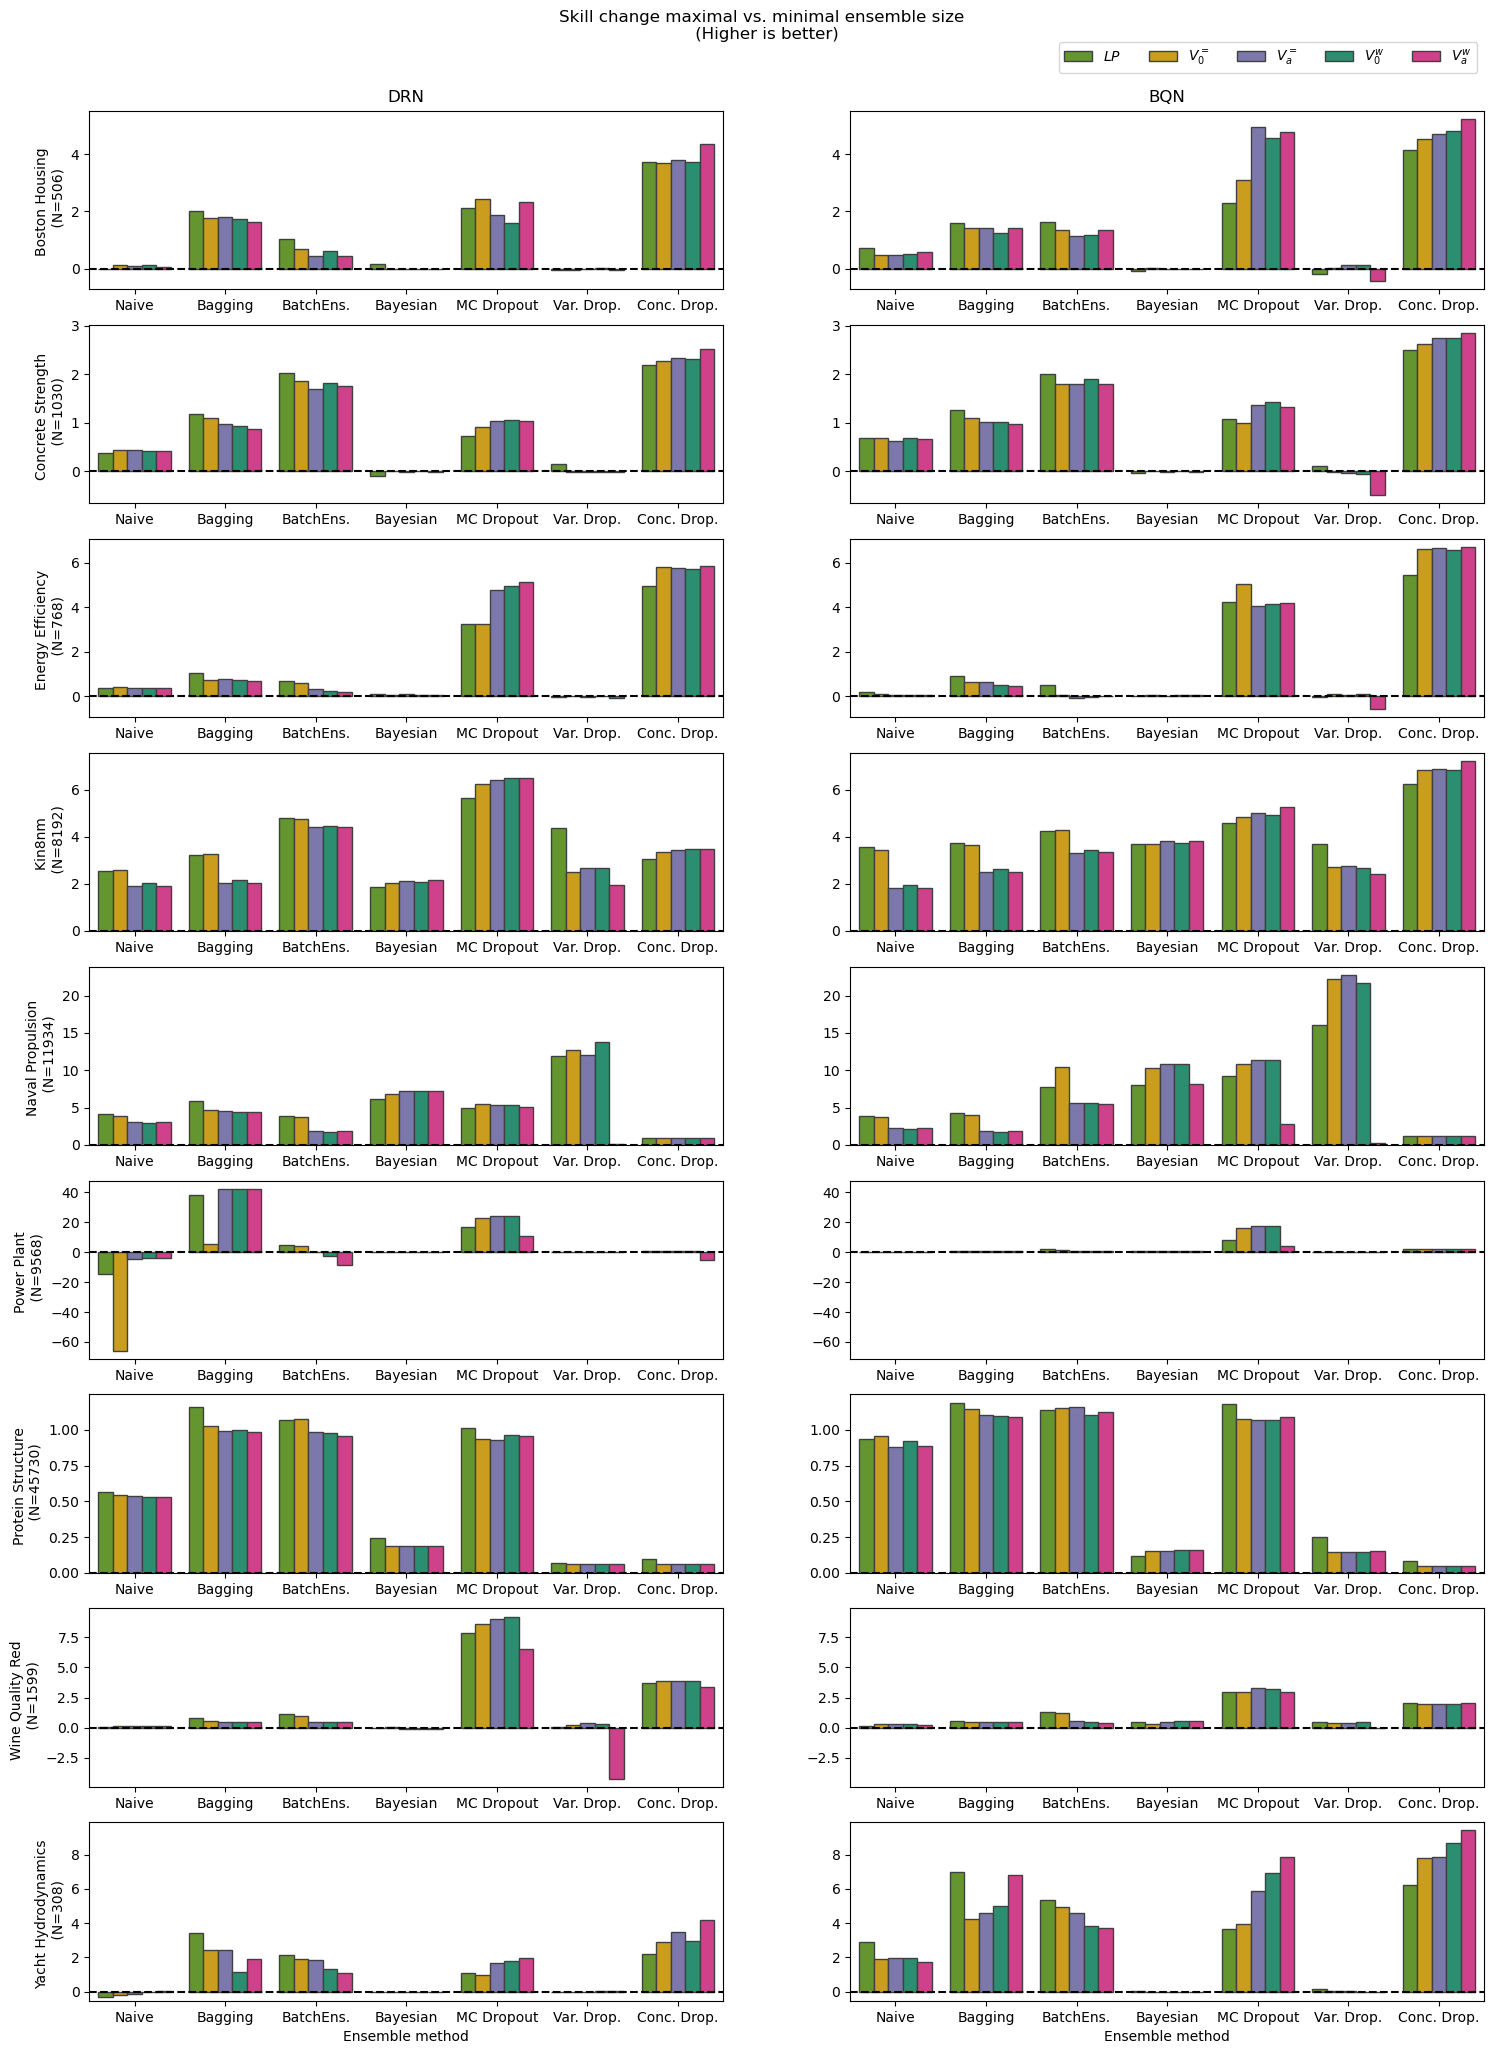

In [42]:
##### Skill - Barplot - x=ensemble_method #####

# Create subplots
fig, axs = plt.subplots(nrows=len(dataset_ls), ncols=len(nn_vec), figsize=(18,18*1.4), squeeze=False)

# Iterate over NN types and datasets
for i_nn, nn in enumerate(nn_vec):
    df_nn = df_skills[df_skills["nn"] == nn]
    for i_dataset, dataset in enumerate(dataset_ls):
        df_nn_dataset = df_nn[(df_nn["dataset"] == dataset)]
        
        # Plot boxplots
        g = sns.barplot(ax=axs[i_dataset][i_nn], data=df_nn_dataset,
                 y="change", x="ens_method", hue="agg", palette=agg_col, edgecolor=kit_cols_dict["grey"])
        
        # Add 0 line
        g.axhline(0, linestyle="--", color=kit_cols_dict["black"])
        # Add labels to x and y axis
        axs[i_dataset][i_nn].set_ylabel("")
        axs[i_dataset][0].set_ylabel(dataset_labels[dataset])
        axs[i_dataset][i_nn].set_xticklabels([ens_method_labels.get(column_name) for column_name in ens_method_ls])
        axs[i_dataset][i_nn].set_xlabel("")
        axs[len(dataset_ls)-1][i_nn].set_xlabel("Ensemble method")

# Remove subplot legends and add figure legend
for ax in [item for sublist in axs for item in sublist]:
    ax.legend([],[], frameon=False)

# Merge subplot legends and displaz figure legend
handles = []
labels = []
for ax in [item for sublist in axs for item in sublist]:
    curr_handles, curr_labels = ax.get_legend_handles_labels()
    for idx, check_label in enumerate(curr_labels):
        if check_label not in labels:
            handles.append(curr_handles[idx])
            labels.append(curr_labels[idx])
    ax.legend([],[], frameon=False)
labels = [agg_labels.get(agg) for agg in labels]
fig.legend(handles, labels, bbox_to_anchor=(0.9, 0.89), ncol=len(agg_meths))

# Set y axis range
# limits = {
#     "boston": [-100, 400],
#     "concrete": [-200,500],
#     "energy": [-50, 400],
#     "kin8nm": [0, 200],
#     "naval": [0, 200],
#     "power": [-100, 200],
#     "protein": [0, 250],
#     "wine": [-50, 300],
#     "yacht": [-100 , 500],
# }
for idx, (ax_drn, ax_bqn) in enumerate(axs):
    drn_l, drn_u = ax_drn.get_ylim()
    bqn_l, bqn_u = ax_bqn.get_ylim()
    drn_range = drn_u - drn_l
    bqn_range = bqn_u - bqn_l
    
    ax_drn.set_ylim(min(drn_l, bqn_l), max(drn_u, bqn_u))
    ax_bqn.set_ylim(min(drn_l, bqn_l), max(drn_u, bqn_u))
    
    # hard_cut_l, hard_cut_u = list(limits.values())[idx]
    # ax_drn.set_ylim(max(hard_cut_l, min(drn_l, bqn_l)), min(hard_cut_u, max(drn_u, bqn_u)))
    # ax_bqn.set_ylim(max(hard_cut_l, min(drn_l, bqn_l)), min(hard_cut_u, max(drn_u, bqn_u)))

# Set titles and legends
axs[0][0].set_title("DRN")
axs[0][1].set_title("BQN")
fig.subplots_adjust(top=0.86)
fig.suptitle(f"Skill change maximal vs. minimal ensemble size \n (Higher is better)", y=0.9)


# Save figure
if export:
    filename=os.path.join(save_dir, "01_skill_barplot_change.pdf")
    fig.savefig(filename, bbox_inches='tight')
    filename=os.path.join(save_dir, "01_skill_barplot_change.png")
    fig.savefig(filename, bbox_inches='tight')

# Archive

In [ ]:
##### Skill - Boxplots - x=ensemble_size #####

# Create subplots
fig, axs = plt.subplots(nrows=len(dataset_ls), ncols=len(nn_vec), figsize=(18,18*1.4), squeeze=False)

# Iterate over NN types and datasets
for i_nn, nn in enumerate(nn_vec):
    df_nn = df_skills[df_skills["nn"] == nn]
    for i_dataset, dataset in enumerate(dataset_ls):
        df_nn_dataset = df_nn[(df_nn["dataset"] == dataset)]
        # Melt dataframe for sns plots
        df_melt = pd.melt(df_nn_dataset, id_vars=["ens_method", "dataset", "nn", "agg"], var_name="ensemble_size", value_name="skill")
        # Only use skills not differences
        df_final = df_melt[df_melt["ensemble_size"].isin([f"skill_{n_ens}" for n_ens in n_ens_vec])]
        
        # Plot boxplots
        g = sns.boxplot(ax=axs[i_dataset][i_nn], data=df_final,
                 y="skill", x="ensemble_size", hue="agg", showfliers=show_outliers, palette=agg_col)
        
        # Add 0 line
        g.axhline(0, linestyle="--", color=kit_cols_dict["blue"])
        # Add labels to y axis
        axs[i_dataset][i_nn].set_ylabel(dataset_labels[dataset])

# Remove subplot legends and add figure legend
for ax in [item for sublist in axs for item in sublist]:
    ax.legend([],[], frameon=False)
handles, labels = axs[0][0].get_legend_handles_labels()
labels = [agg_labels.get(agg) for agg in labels]

# Set y axis range
for ax_drn, ax_bqn in axs:
    drn_l, drn_u = ax_drn.get_ylim()
    bqn_l, bqn_u = ax_bqn.get_ylim()
    drn_range = drn_u - drn_l
    bqn_range = bqn_u - bqn_l
    
    ax_drn.set_ylim(min(drn_l, bqn_l), max(drn_u, bqn_u))
    ax_bqn.set_ylim(min(drn_l, bqn_l), max(drn_u, bqn_u))

# Set titles and legends
axs[0][0].set_title("DRN", fontweight="bold")
axs[0][1].set_title("BQN", fontweight="bold")
fig.subplots_adjust(top=0.85)
fig.legend(handles, labels, bbox_to_anchor=(0.9, 0.88), ncol=len(labels))
fig.suptitle(f"Skill aggregated over ensemble methods", y=0.9)

# Save figure
if export:
    if show_outliers:
        filename=os.path.join(save_dir, "01_skill_boxplot.pdf")
        fig.savefig(filename, bbox_inches='tight')
        filename=os.path.join(save_dir, "01_skill_boxplot.png")
        fig.savefig(filename, bbox_inches='tight')
    else:
        filename=os.path.join(save_dir, "01_skill_boxplot_no_outliers.pdf")
        fig.savefig(filename, bbox_inches='tight')
        filename=os.path.join(save_dir, "01_skill_boxplot_no_outliers.png")
        fig.savefig(filename, bbox_inches='tight')

## Lineplot - Top k skill for increasing ensemble size

- Columns: NN type (DRN, BQN)
- Rows: Datasets

Filtered for:

- Aggregation method (here: LP)

In [10]:
# Define filters
agg_method_to_plot = "lp"
top_k = 5
top_k_score = "avg_skill"

Text(0.5, 0.98, 'Aggregation method LP, show only Top 5')

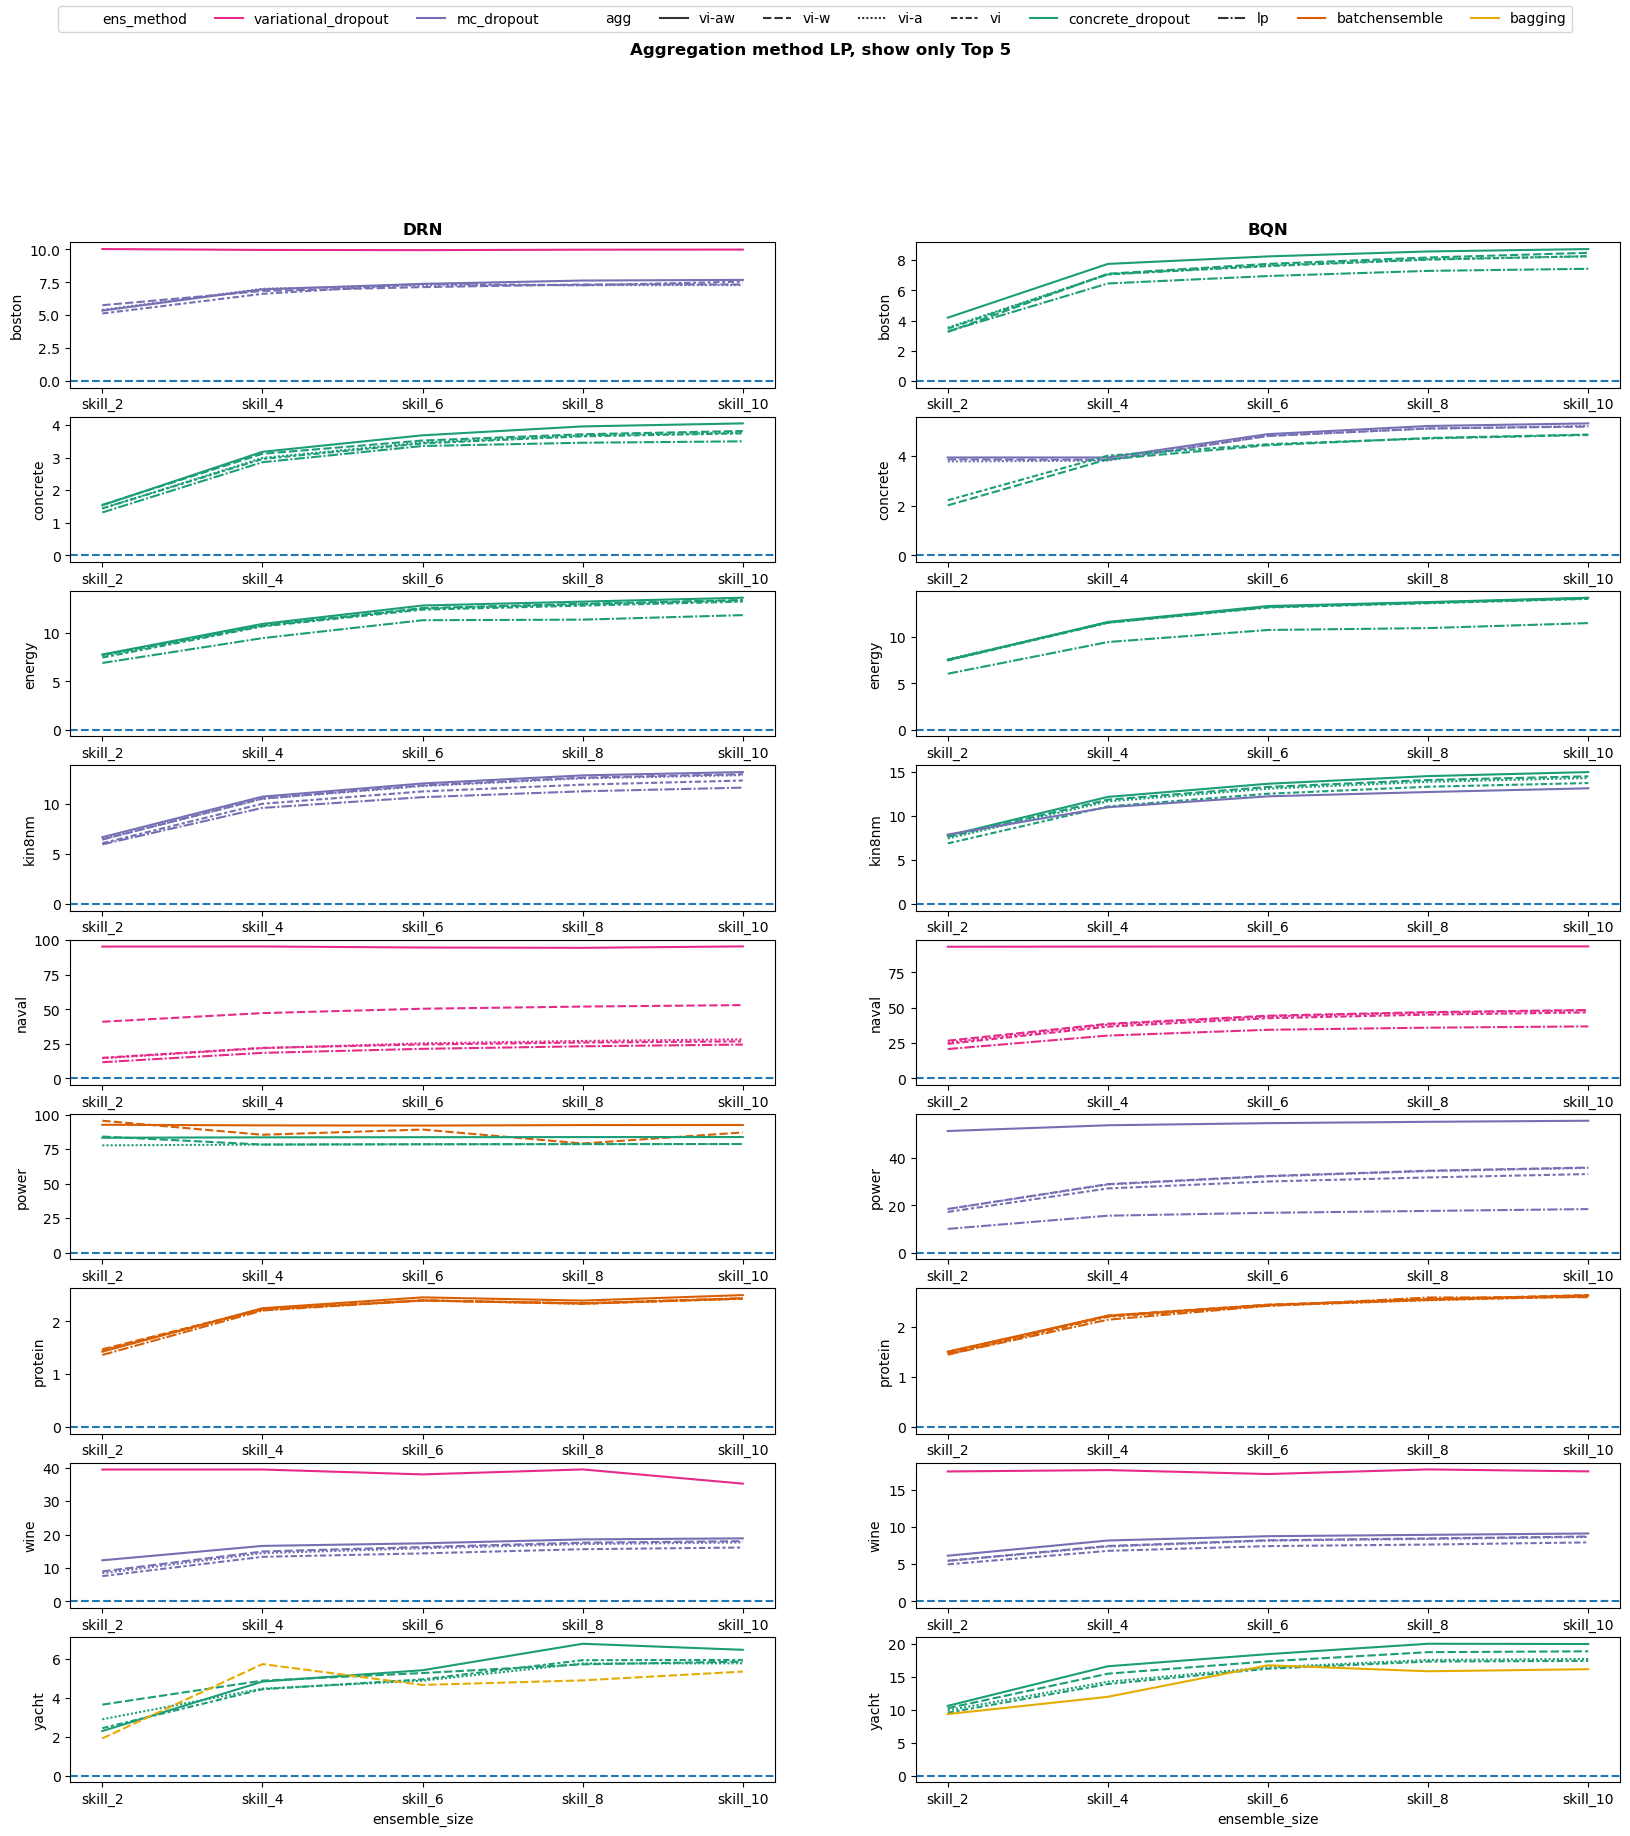

In [11]:
##### Skill - Lineplots - x=ensemble_size #####

# Create subplots
fig, axs = plt.subplots(nrows=len(dataset_ls), ncols=len(nn_vec), figsize=(20,20), squeeze=False)

# Filter for specific aggregation method
df_agg = df_skills[df_skills["agg"] == agg_method_to_plot]
# Sort and select best k results
df_agg_top = df_skills.sort_values(["dataset", "nn", top_k_score], ascending=False).groupby(["dataset", "nn"]).head(top_k)

# Iterate over NN types and datasets
for i_nn, nn in enumerate(nn_vec):
    df_nn = df_agg_top[df_agg_top["nn"] == nn]
    for i_dataset, dataset in enumerate(dataset_ls):
        df_nn_dataset = df_nn[(df_nn["dataset"] == dataset)]
        # Melt dataframe for sns plots
        df_melt = pd.melt(df_nn_dataset, id_vars=["ens_method", "dataset", "nn", "agg"], var_name="ensemble_size", value_name="skill")
        # Only use skills not differences
        df_final = df_melt[df_melt["ensemble_size"].isin([f"skill_{n_ens}" for n_ens in n_ens_vec])]
        
        # Plot boxplots
        g = sns.lineplot(data=df_final, x="ensemble_size", y="skill", hue="ens_method", style="agg", ax=axs[i_dataset][i_nn], palette=ens_col)
        
        # Add 0 line
        g.axhline(0, linestyle="--")
        # Add labels to y axis
        axs[i_dataset][i_nn].set_ylabel(dataset)

# Merge subplot legends and displaz figure legend
handles = []
labels = []
for ax in [item for sublist in axs for item in sublist]:
    curr_handles, curr_labels = ax.get_legend_handles_labels()
    for idx, check_label in enumerate(curr_labels):
        if check_label not in labels:
            handles.append(curr_handles[idx])
            labels.append(curr_labels[idx])
    ax.legend([],[], frameon=False)

# Set titles and legends
axs[0][0].set_title("DRN", fontweight="bold")
axs[0][1].set_title("BQN", fontweight="bold")
fig.legend(handles, labels, loc='upper center', ncol=len(labels))
fig.suptitle(f"Aggregation method {agg_method_to_plot.upper()}, show only Top {top_k}", fontweight="bold")

## Lineplot - Median / Mean skill per aggregation method

- Columns: NN type (DRN, BQN)
- Rows: Datasets

Aggregated over:

- Ensemble method by `aggregation`

In [29]:
aggregation = "median"
errors = None

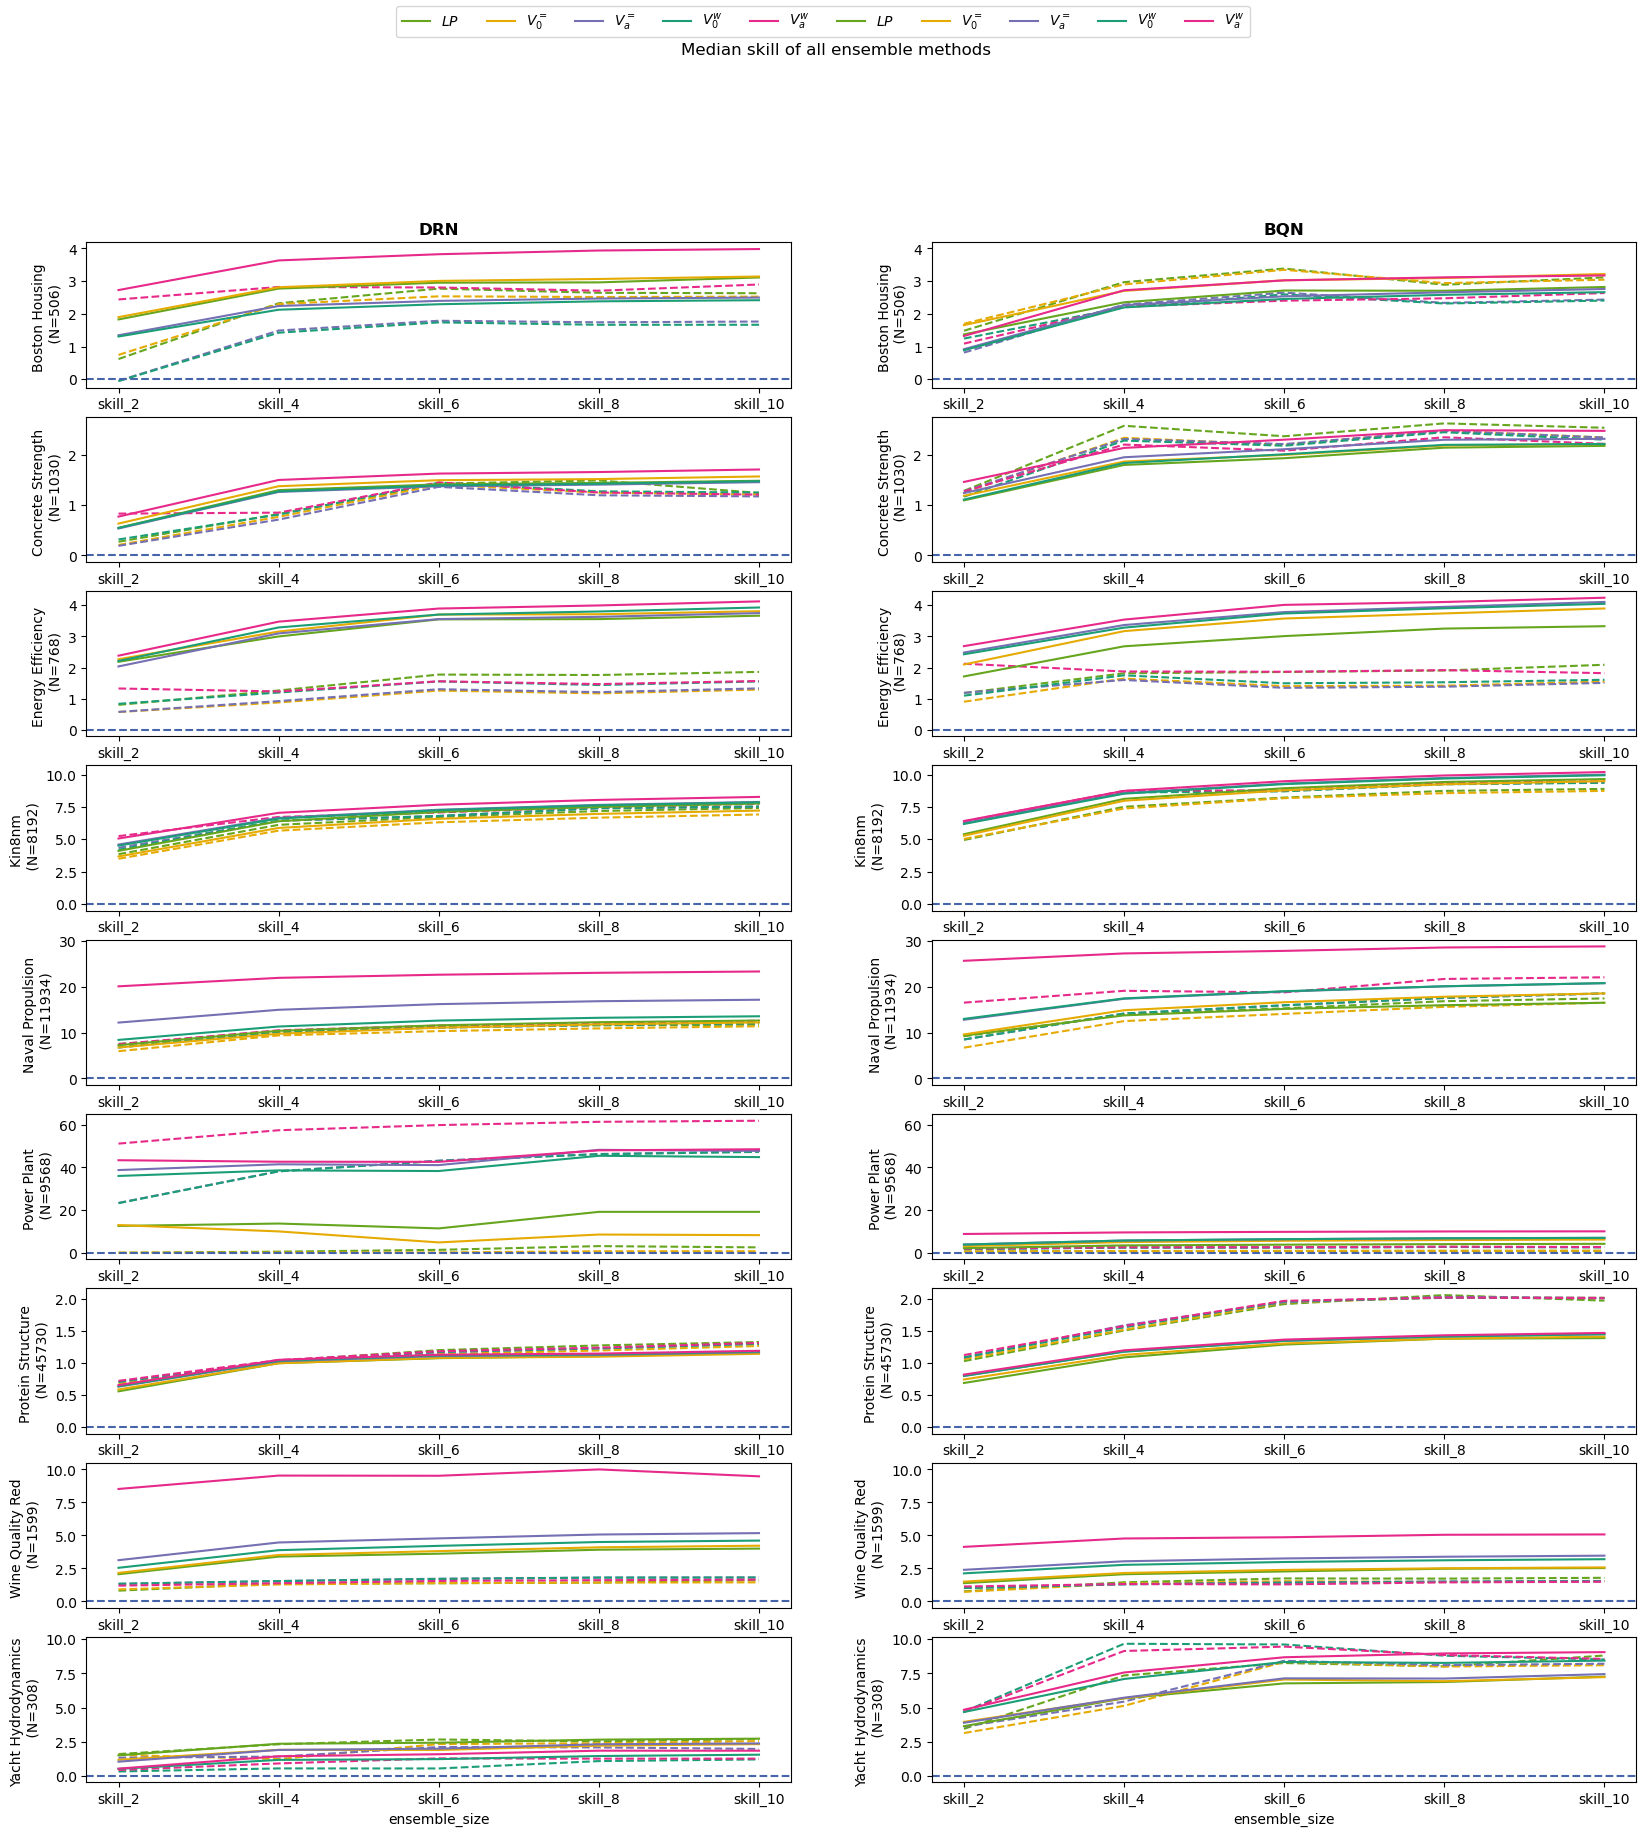

In [40]:
##### Skill - Lineplot - x=ensemble_size #####

# Create subplots
fig, axs = plt.subplots(nrows=len(dataset_ls), ncols=len(nn_vec), figsize=(20,20), squeeze=False)

# Iterate over NN types and datasets
for i_nn, nn in enumerate(nn_vec):
    df_nn = df_skills[df_skills["nn"] == nn]
    for i_dataset, dataset in enumerate(dataset_ls):
        df_nn_dataset = df_nn[(df_nn["dataset"] == dataset)]
        # Melt dataframe for sns plots
        df_melt = pd.melt(df_nn_dataset, id_vars=["ens_method", "dataset", "nn", "agg"], var_name="ensemble_size", value_name="skill")
        # Only use skills not differences
        df_final = df_melt[df_melt["ensemble_size"].isin([f"skill_{n_ens}" for n_ens in n_ens_vec])]
        
        # Plot boxplots
        g = sns.lineplot(ax=axs[i_dataset][i_nn], data=df_final,
                 y="skill", x="ensemble_size", hue="agg", palette=agg_col, estimator="median", errorbar=errors, linestyle="dashed")
        g = sns.lineplot(ax=axs[i_dataset][i_nn], data=df_final,
                 y="skill", x="ensemble_size", hue="agg", palette=agg_col, estimator="mean", errorbar=errors, linestyle="solid")
        # Add 0 line
        g.axhline(0, linestyle="--", color=kit_cols_dict["blue"])
        # Add labels to y axis
        axs[i_dataset][i_nn].set_ylabel(dataset_labels[dataset])

# Remove subplot legends and add figure legend
for ax in [item for sublist in axs for item in sublist]:
    ax.legend([],[], frameon=False)
handles, labels = axs[0][0].get_legend_handles_labels()

# Set y axis range
for ax_drn, ax_bqn in axs:
    drn_l, drn_u = ax_drn.get_ylim()
    bqn_l, bqn_u = ax_bqn.get_ylim()
    drn_range = drn_u - drn_l
    bqn_range = bqn_u - bqn_l
    
    ax_drn.set_ylim(min(drn_l, bqn_l), max(drn_u, bqn_u))
    ax_bqn.set_ylim(min(drn_l, bqn_l), max(drn_u, bqn_u))

# Set titles and legends
axs[0][0].set_title("DRN", fontweight="bold")
axs[0][1].set_title("BQN", fontweight="bold")
fig.suptitle(f"Median skill of all ensemble methods")
fig.legend(handles, [agg_labels.get(agg) for agg in labels], loc='upper center', ncol=len(labels))

# Save figure
# if export:
#     filename=os.path.join(save_dir, "01_skill_lineplot.pdf")
#     fig.savefig(filename, bbox_inches='tight')
#     filename=os.path.join(save_dir, "01_skill_lineplot.png")
#     fig.savefig(filename, bbox_inches='tight')

ValueError: Axis limits cannot be NaN or Inf

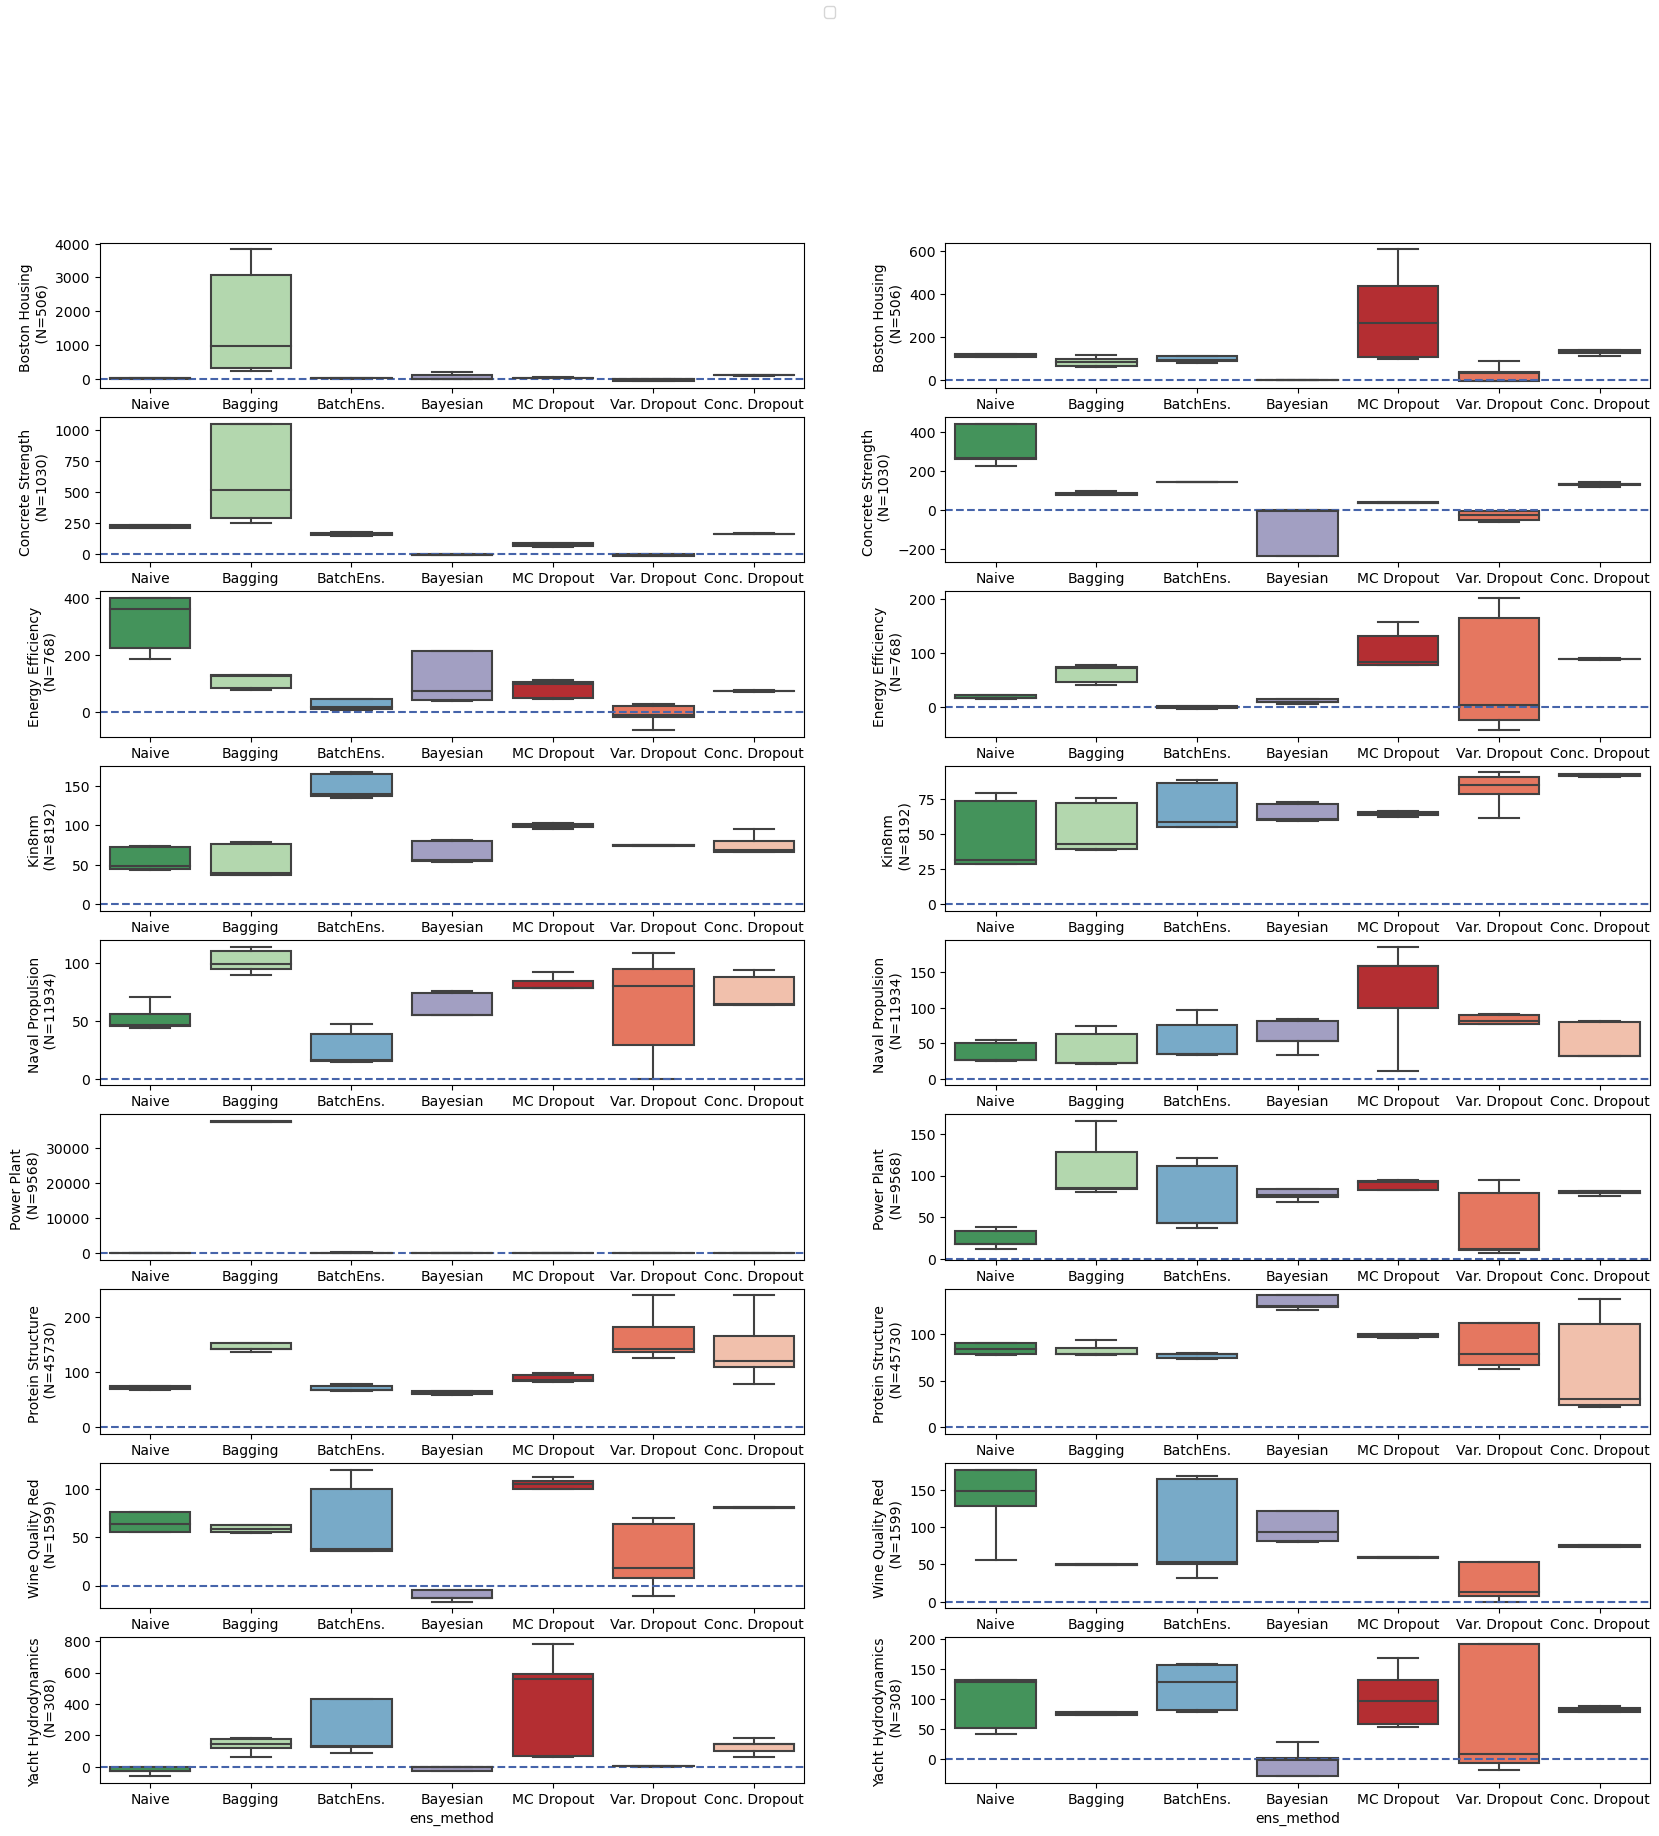

In [55]:
##### Skill - Boxplot - x=ensemble_method #####

# Create subplots
fig, axs = plt.subplots(nrows=len(dataset_ls), ncols=len(nn_vec), figsize=(20,20), squeeze=False)

# Iterate over NN types and datasets
for i_nn, nn in enumerate(nn_vec):
    df_nn = df_skills[df_skills["nn"] == nn]
    for i_dataset, dataset in enumerate(dataset_ls):
        df_nn_dataset = df_nn[(df_nn["dataset"] == dataset)]
        # Melt dataframe for sns plots
        # df_melt = pd.melt(df_nn_dataset, id_vars=["ens_method", "dataset", "nn", "agg"], var_name="ensemble_size", value_name="score")
        # Only use skills not differences
        # df_final = df_melt[df_melt["ensemble_size"].isin([f"score_{n_ens}" for n_ens in n_ens_vec])]
        
        # Plot boxplots
        g = sns.boxplot(ax=axs[i_dataset][i_nn], data=df_nn_dataset,
                 y="change", x="ens_method", showfliers=show_outliers, palette=ens_col)#, hue="agg", palette=agg_col, edgecolor=kit_cols_dict["grey"])
        # g = sns.lineplot(ax=axs[i_dataset][i_nn], data=df_final,
        #          y="score", x="ensemble_size", hue="agg", palette=agg_col, estimator="mean", errorbar=errors, linestyle="solid")
        
        # Add 0 line
        g.axhline(0, linestyle="--", color=kit_cols_dict["blue"])
        # Add labels to y axis
        axs[i_dataset][i_nn].set_ylabel(dataset_labels[dataset])
        axs[i_dataset][i_nn].set_xticklabels([ens_method_labels.get(column_name) for column_name in ens_method_ls])

# Remove subplot legends and add figure legend
for ax in [item for sublist in axs for item in sublist]:
    ax.legend([],[], frameon=False)

# Merge subplot legends and displaz figure legend
handles = []
labels = []
for ax in [item for sublist in axs for item in sublist]:
    curr_handles, curr_labels = ax.get_legend_handles_labels()
    for idx, check_label in enumerate(curr_labels):
        if check_label not in labels:
            handles.append(curr_handles[idx])
            labels.append(curr_labels[idx])
    ax.legend([],[], frameon=False)
fig.legend(handles, [agg_labels.get(agg) for agg in labels], loc='upper center', ncol=len(agg_meths))

# Set y axis range
for ax_drn, ax_bqn in axs:
    drn_l, drn_u = ax_drn.get_ylim()
    bqn_l, bqn_u = ax_bqn.get_ylim()
    drn_range = drn_u - drn_l
    bqn_range = bqn_u - bqn_l
    
    hard_cut_l = np.inf # -500
    hard_cut_u = -np.inf # 500
    
    ax_drn.set_ylim(max(hard_cut_l, min(drn_l, bqn_l)), min(hard_cut_u, max(drn_u, bqn_u)))
    ax_bqn.set_ylim(max(hard_cut_l, min(drn_l, bqn_l)), min(hard_cut_u, max(drn_u, bqn_u)))
    
    # ax_drn.set_ylim(hard_cut_l, hard_cut_u)
    # ax_bqn.set_ylim(hard_cut_l, hard_cut_u)

# Set titles and legends
axs[0][0].set_title("DRN", fontweight="bold")
axs[0][1].set_title("BQN", fontweight="bold")
fig.suptitle(f"Relative change of skill_10 to skill_2")


# Save figure
if export:
    filename=os.path.join(save_dir, "01_skill_boxplot_change.pdf")
    fig.savefig(filename, bbox_inches='tight')
    filename=os.path.join(save_dir, "01_skill_boxplot_change.png")
    fig.savefig(filename, bbox_inches='tight')

## Do same for scores

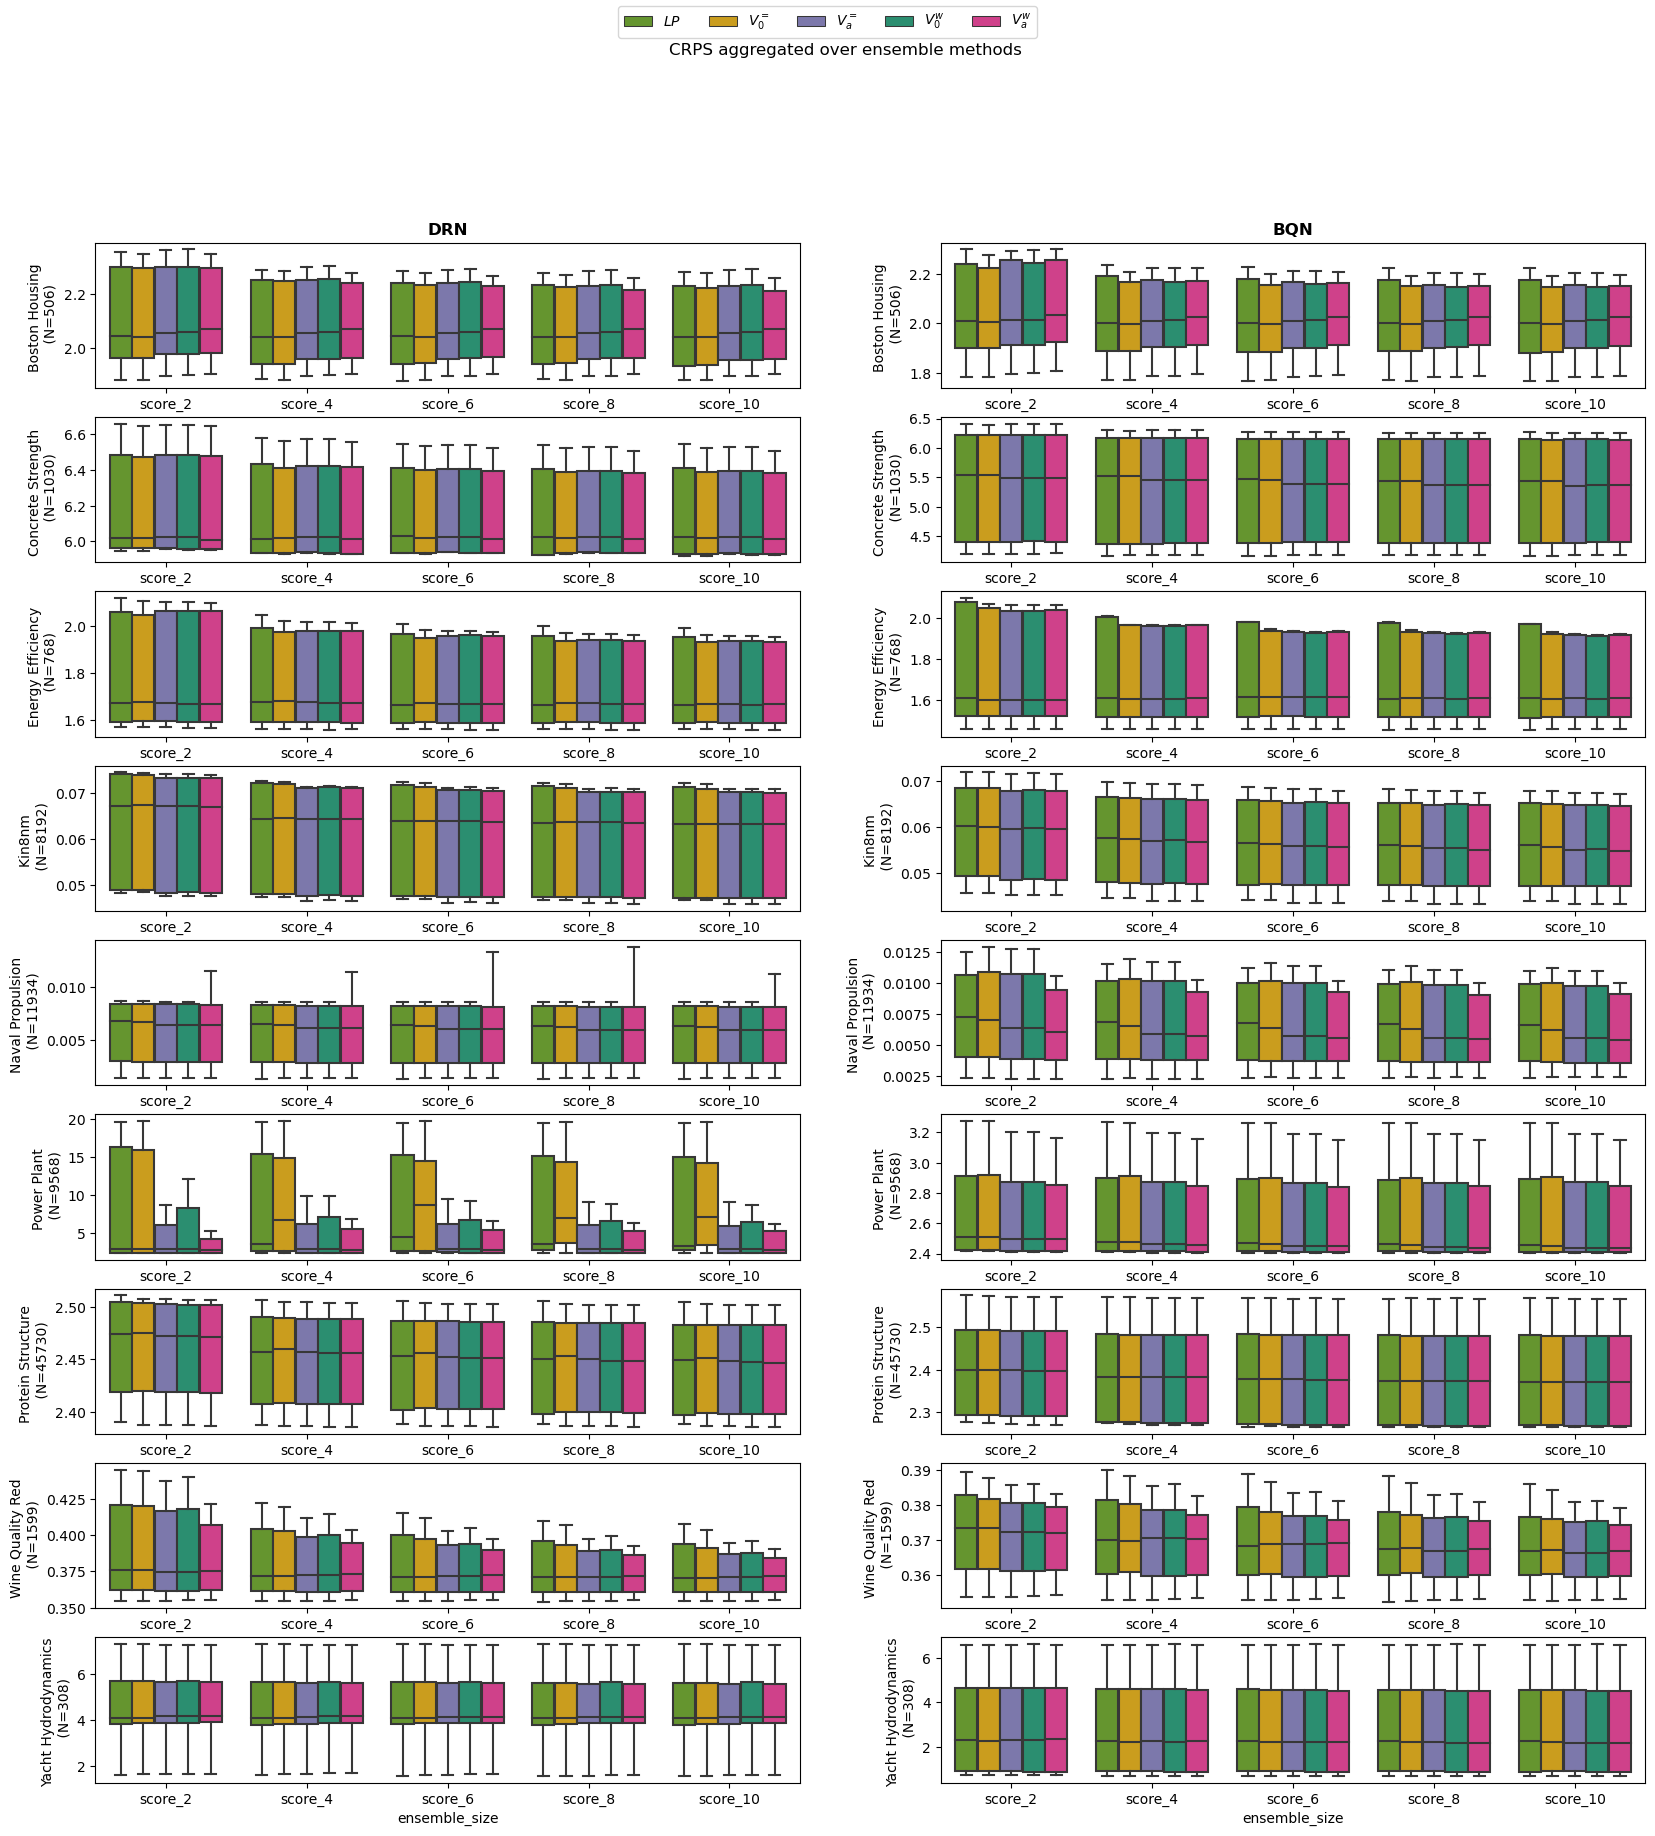

In [8]:
##### Score - Boxplots - x=ensemble_size #####

# Create subplots
fig, axs = plt.subplots(nrows=len(dataset_ls), ncols=len(nn_vec), figsize=(20,20), squeeze=False)

# Iterate over NN types and datasets
for i_nn, nn in enumerate(nn_vec):
    df_nn = df_scores[df_scores["nn"] == nn]
    for i_dataset, dataset in enumerate(dataset_ls):
        df_nn_dataset = df_nn[(df_nn["dataset"] == dataset)]
        # Melt dataframe for sns plots
        df_melt = pd.melt(df_nn_dataset, id_vars=["ens_method", "dataset", "nn", "agg"], var_name="ensemble_size", value_name="score")
        # Only use skills not differences
        df_final = df_melt[df_melt["ensemble_size"].isin([f"score_{n_ens}" for n_ens in n_ens_vec])]
        
        # Plot boxplots
        g = sns.boxplot(ax=axs[i_dataset][i_nn], data=df_final,
                 y="score", x="ensemble_size", hue="agg", showfliers=False, palette=agg_col)
        
        # Add 0 line
        # g.axhline(0, linestyle="--", color=kit_cols_dict["blue"])
        # Add labels to y axis
        axs[i_dataset][i_nn].set_ylabel(dataset_labels[dataset])

# Remove subplot legends and add figure legend
for ax in [item for sublist in axs for item in sublist]:
    ax.legend([],[], frameon=False)
handles, labels = axs[0][0].get_legend_handles_labels()

# Set titles and legends
axs[0][0].set_title("DRN", fontweight="bold")
axs[0][1].set_title("BQN", fontweight="bold")
fig.suptitle(f"CRPS aggregated over ensemble methods")
fig.legend(handles, [agg_labels.get(agg) for agg in labels], loc='upper center', ncol=len(labels))

# Save figure
# if export:
#     filename=os.path.join(save_dir, "01_score_boxplot.pdf")
#     fig.savefig(filename, bbox_inches='tight')
#     filename=os.path.join(save_dir, "01_score_boxplot.png")
#     fig.savefig(filename, bbox_inches='tight')

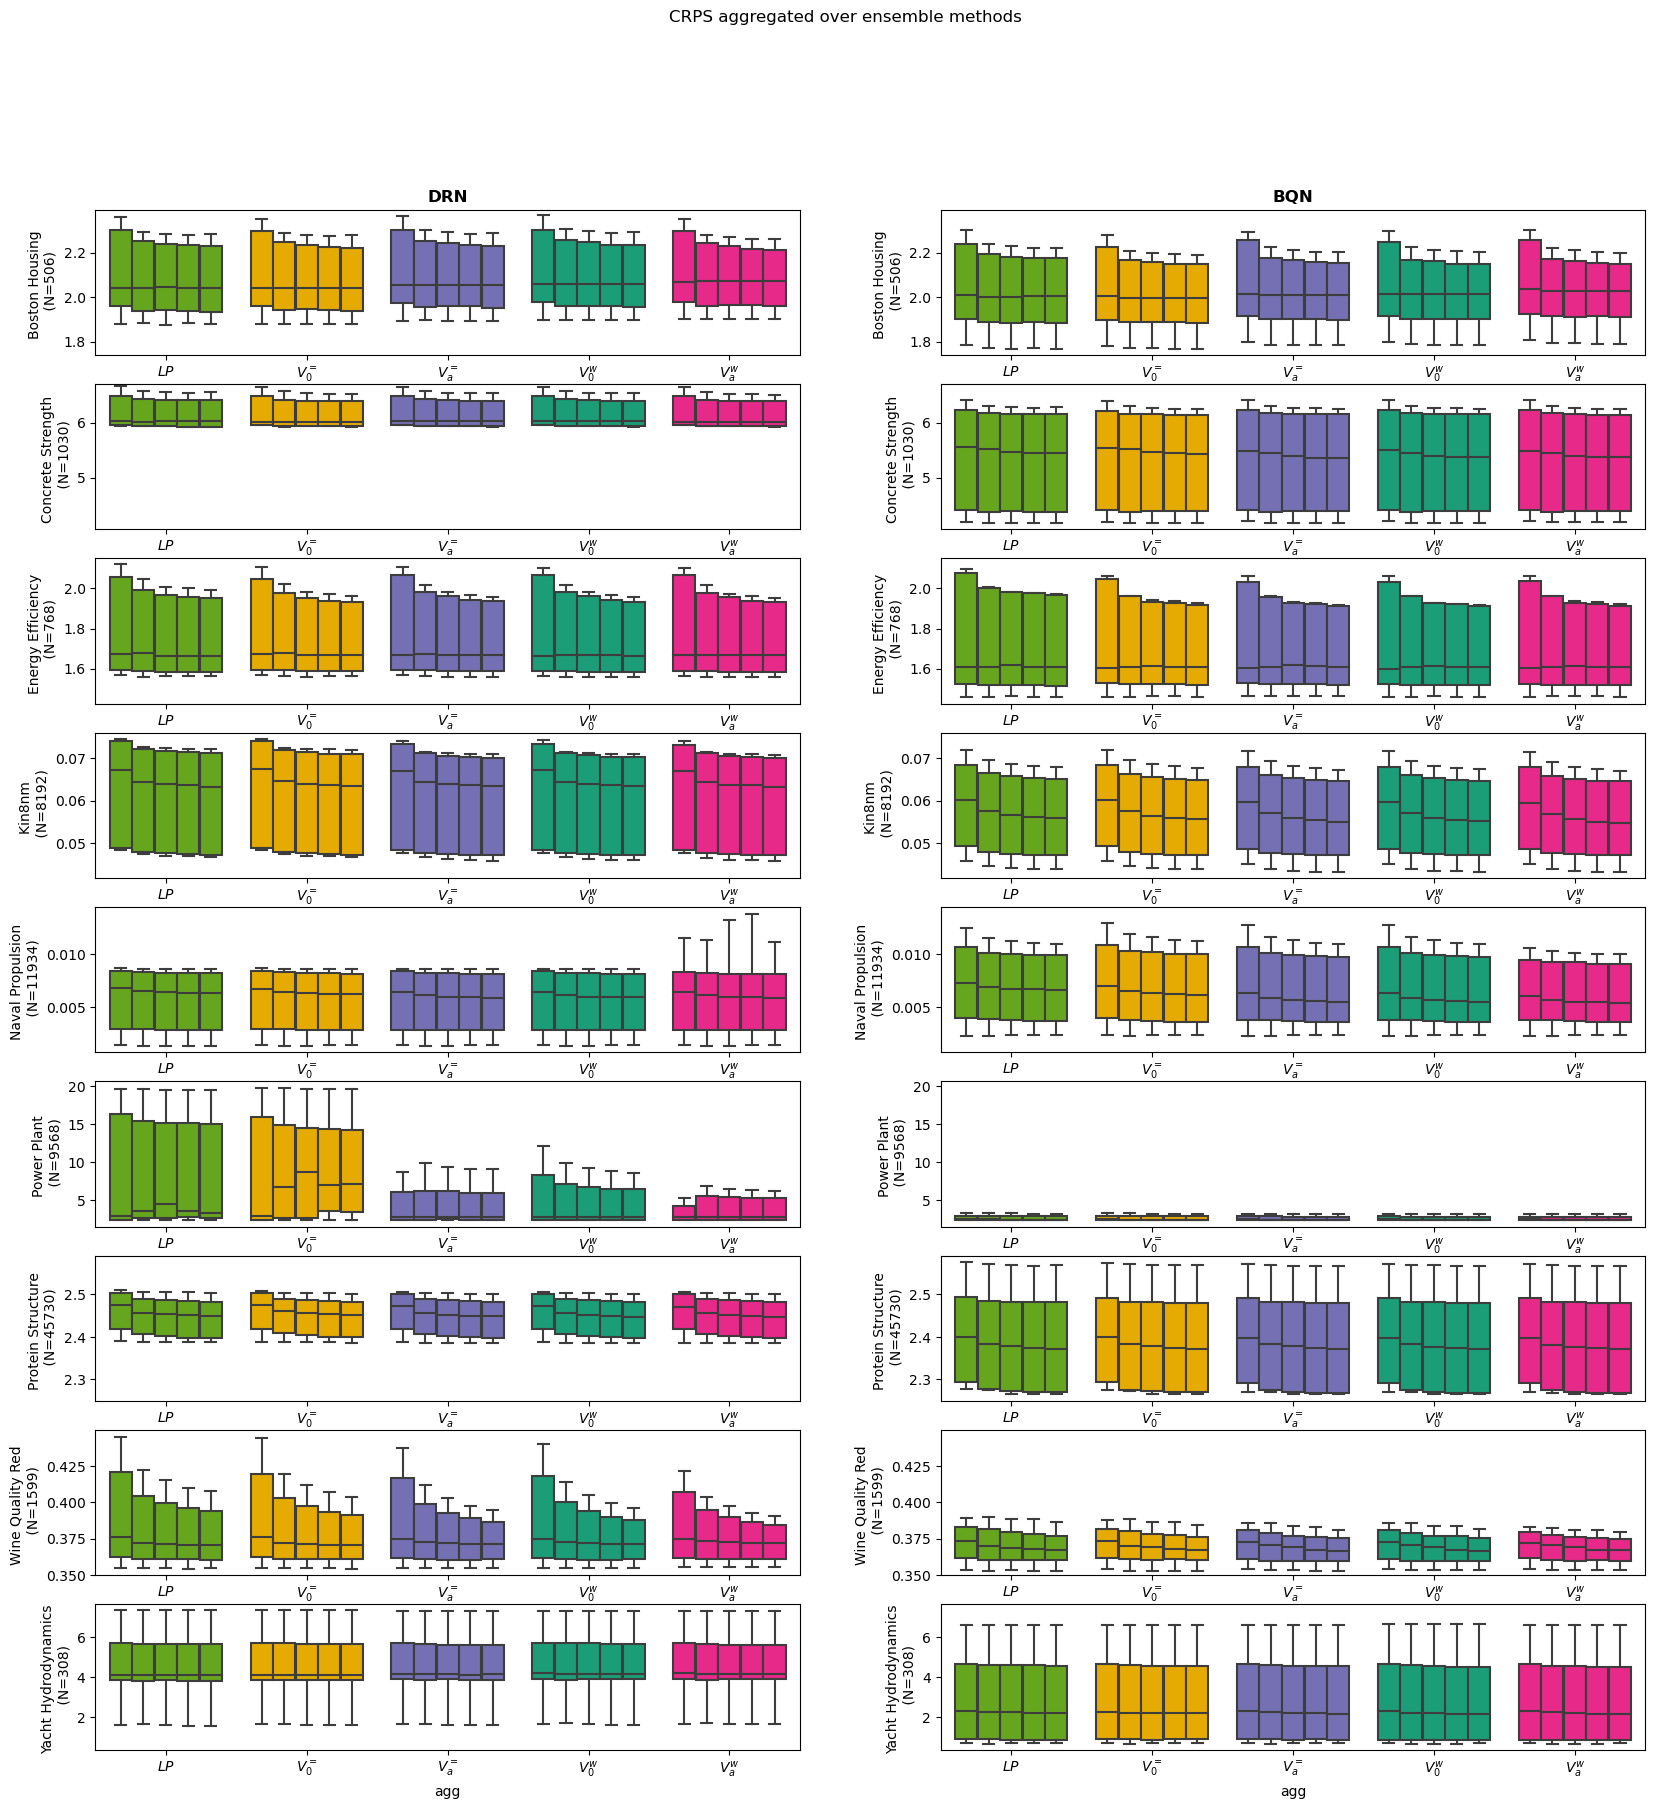

In [9]:
##### Score - Boxplots - x=aggregation_method #####

# Create subplots
fig, axs = plt.subplots(nrows=len(dataset_ls), ncols=len(nn_vec), figsize=(20,20), squeeze=False)

# Iterate over NN types and datasets
for i_nn, nn in enumerate(nn_vec):
    df_nn = df_scores[df_scores["nn"] == nn]
    for i_dataset, dataset in enumerate(dataset_ls):
        df_nn_dataset = df_nn[(df_nn["dataset"] == dataset)]
        # Melt dataframe for sns plots
        df_melt = pd.melt(df_nn_dataset, id_vars=["ens_method", "dataset", "nn", "agg"], var_name="ensemble_size", value_name="score")
        # Only use skills not differences
        df_final = df_melt[df_melt["ensemble_size"].isin([f"score_{n_ens}" for n_ens in n_ens_vec])]
        
        # Plot boxplots
        g = sns.boxplot(ax=axs[i_dataset][i_nn], data=df_final,
                 y="score", x="agg", hue="ensemble_size", showfliers=show_outliers)
        
        # Add 0 line
        # g.axhline(0, linestyle="--", color=kit_cols_dict["blue"])
        # Add labels to y axis
        axs[i_dataset][i_nn].set_ylabel(dataset_labels[dataset])
        axs[i_dataset][i_nn].set_xticklabels([agg_labels.get(agg) for agg in agg_meths])

        # Change color
        boxplots = axs[i_dataset][i_nn].patches
        agg_col_ls = list(agg_col.values())[:5]
        for i, boxplot in enumerate(boxplots[1:len(agg_col_ls)*2:2] + boxplots[len(agg_col_ls)*2:]):  # type: ignore
            boxplot.set_facecolor(agg_col_ls[i//5])

# # Remove subplot legends and add figure legend
for ax in [item for sublist in axs for item in sublist]:
    ax.legend([],[], frameon=False)
handles, labels = axs[0][0].get_legend_handles_labels()

# Set y axis range
for ax_drn, ax_bqn in axs:
    drn_l, drn_u = ax_drn.get_ylim()
    bqn_l, bqn_u = ax_bqn.get_ylim()
    drn_range = drn_u - drn_l
    bqn_range = bqn_u - bqn_l
    
    ax_drn.set_ylim(min(drn_l, bqn_l), max(drn_u, bqn_u))
    ax_bqn.set_ylim(min(drn_l, bqn_l), max(drn_u, bqn_u))

# Set titles and legends
axs[0][0].set_title("DRN", fontweight="bold")
axs[0][1].set_title("BQN", fontweight="bold")
fig.suptitle(f"CRPS aggregated over ensemble methods")

# Save figure
# if export:
#     if show_outliers:
#         filename=os.path.join(save_dir, "01_score_boxplot_per_agg.pdf")
#         fig.savefig(filename, bbox_inches='tight')
#         filename=os.path.join(save_dir, "01_score_boxplot_per_agg.png")
#         fig.savefig(filename, bbox_inches='tight')
#     else:
#         filename=os.path.join(save_dir, "01_score_boxplot_per_agg_no_outliers.pdf")
#         fig.savefig(filename, bbox_inches='tight')
#         filename=os.path.join(save_dir, "01_score_boxplot_per_agg_no_outliers.png")
#         fig.savefig(filename, bbox_inches='tight')

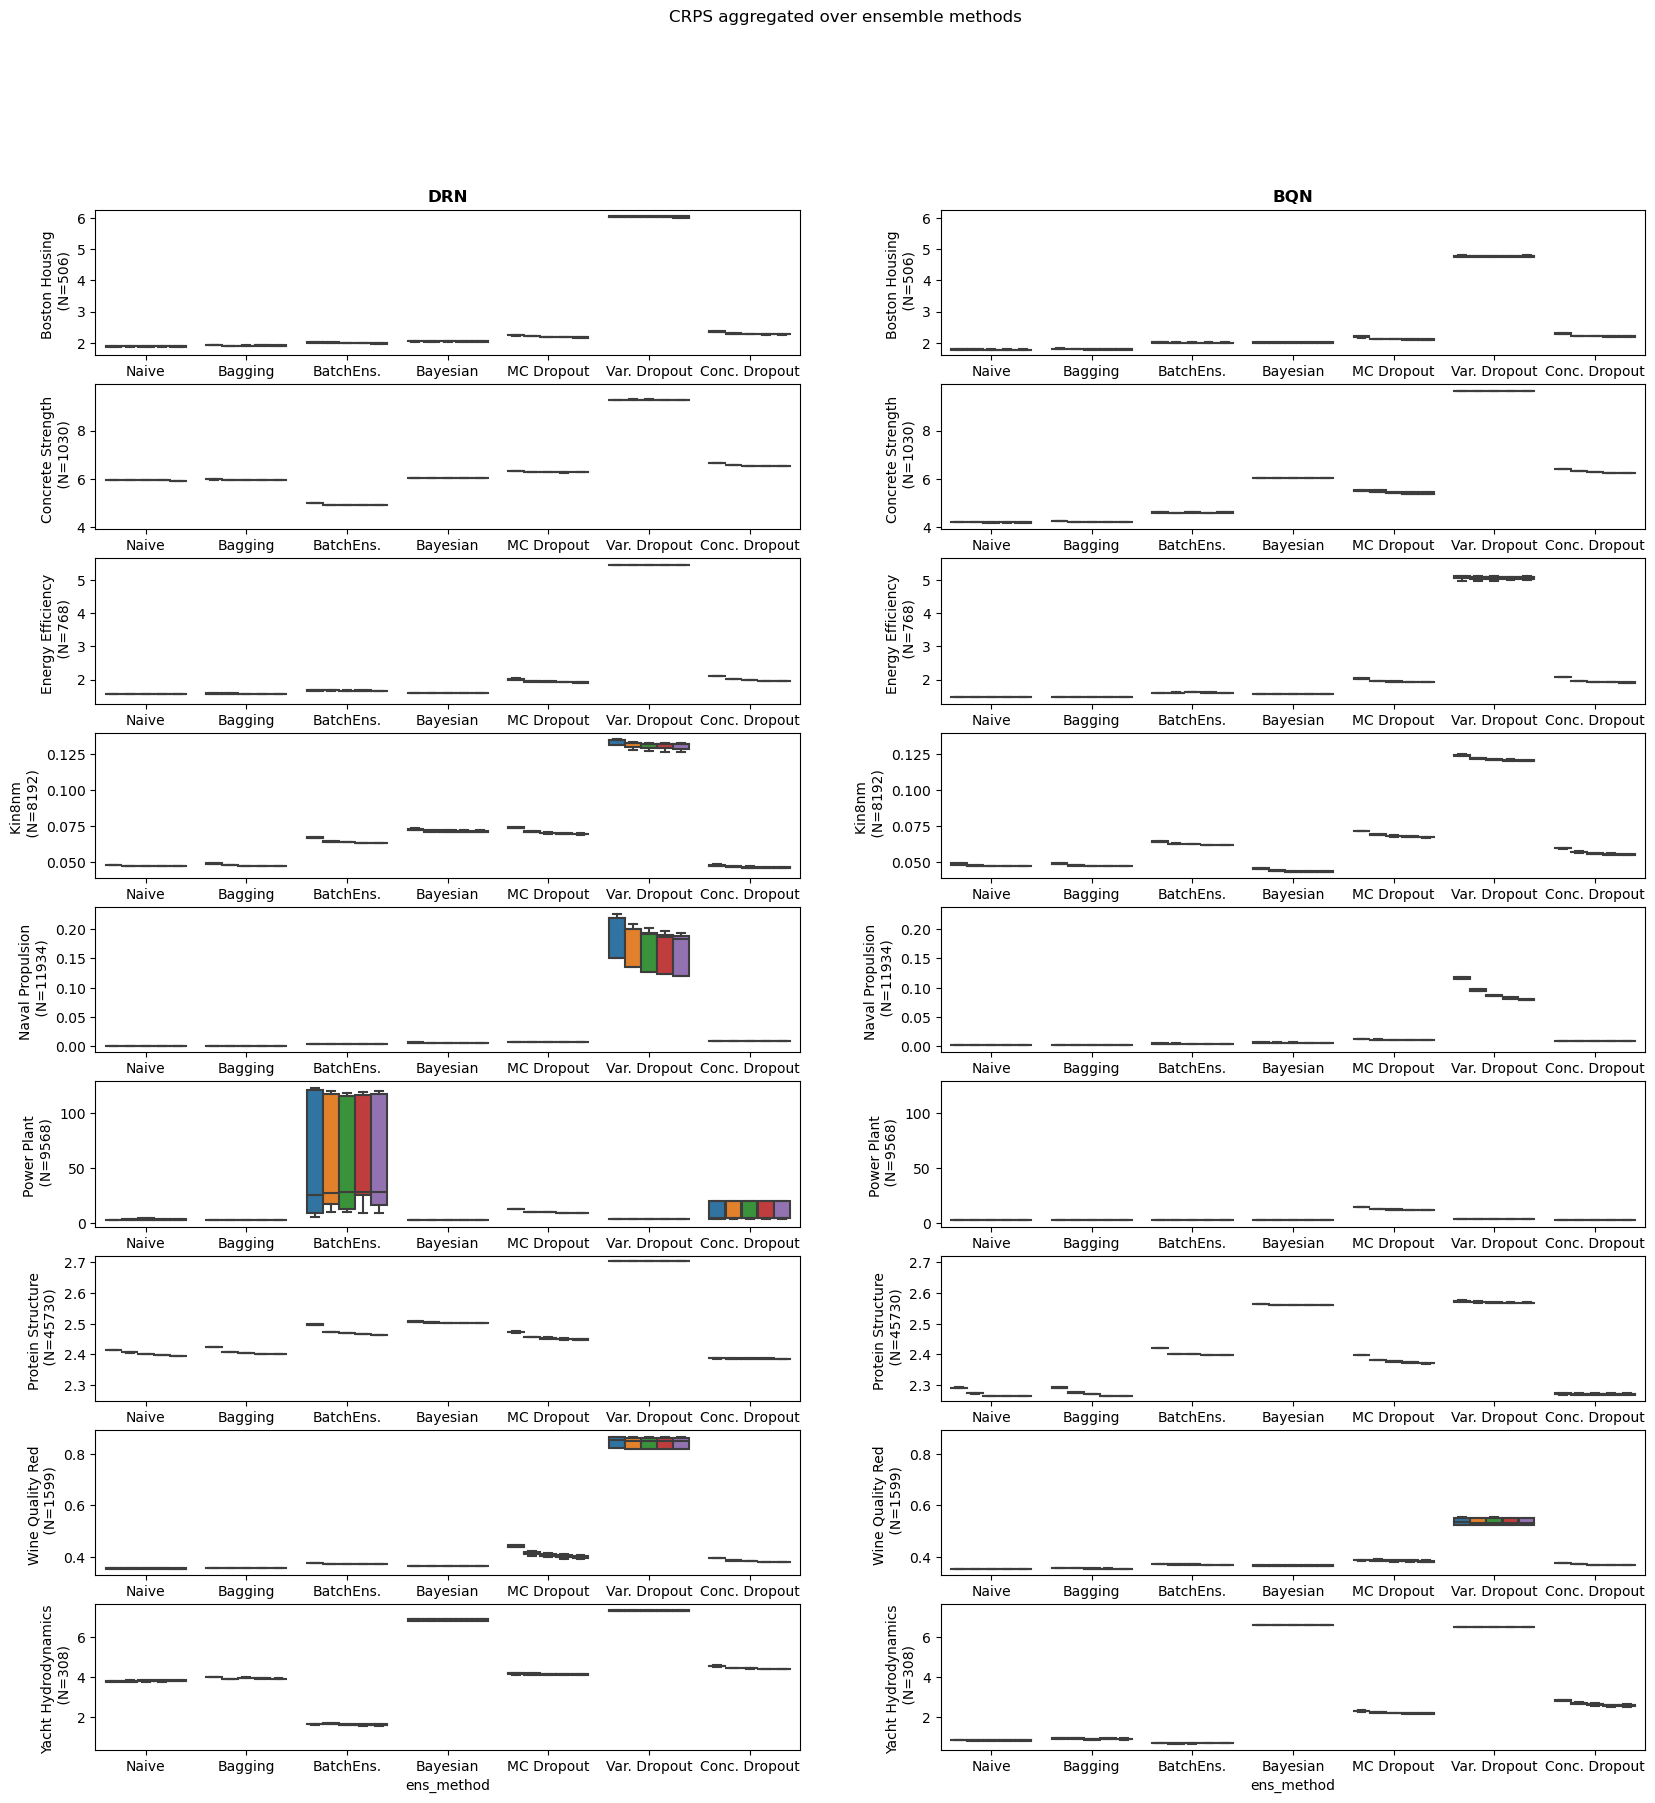

In [11]:
##### Score - Boxplots - x=ensemble_method #####

# Create subplots
fig, axs = plt.subplots(nrows=len(dataset_ls), ncols=len(nn_vec), figsize=(20,20), squeeze=False)

# Iterate over NN types and datasets
for i_nn, nn in enumerate(nn_vec):
    df_nn = df_scores[df_scores["nn"] == nn]
    for i_dataset, dataset in enumerate(dataset_ls):
        df_nn_dataset = df_nn[(df_nn["dataset"] == dataset)]
        # Melt dataframe for sns plots
        df_melt = pd.melt(df_nn_dataset, id_vars=["ens_method", "dataset", "nn", "agg"], var_name="ensemble_size", value_name="score")
        # Only use skills not differences
        df_final = df_melt[df_melt["ensemble_size"].isin([f"score_{n_ens}" for n_ens in n_ens_vec])]
        
        # Plot boxplots
        g = sns.boxplot(ax=axs[i_dataset][i_nn], data=df_final,
                 y="score", x="ens_method", hue="ensemble_size", showfliers=show_outliers)
        
        # Add 0 line
        # g.axhline(0, linestyle="--", color=kit_cols_dict["blue"])
        # Add labels to y axis
        axs[i_dataset][i_nn].set_ylabel(dataset_labels[dataset])
        axs[i_dataset][i_nn].set_xticklabels([ens_method_labels.get(ens) for ens in ens_method_ls])

        # Change color
        boxplots = axs[i_dataset][i_nn].patches
        # agg_col_ls = list(agg_col.values())[:5]
        # for i, boxplot in enumerate(boxplots[1:len(agg_col_ls)*2:2] + boxplots[len(agg_col_ls)*2:]):  # type: ignore
        #     boxplot.set_facecolor(agg_col_ls[i//len(agg_col_ls)])

# # Remove subplot legends and add figure legend
for ax in [item for sublist in axs for item in sublist]:
    ax.legend([],[], frameon=False)
handles, labels = axs[0][0].get_legend_handles_labels()

# Set y axis range
for ax_drn, ax_bqn in axs:
    drn_l, drn_u = ax_drn.get_ylim()
    bqn_l, bqn_u = ax_bqn.get_ylim()
    drn_range = drn_u - drn_l
    bqn_range = bqn_u - bqn_l
    
    ax_drn.set_ylim(min(drn_l, bqn_l), max(drn_u, bqn_u))
    ax_bqn.set_ylim(min(drn_l, bqn_l), max(drn_u, bqn_u))

# Set titles and legends
axs[0][0].set_title("DRN", fontweight="bold")
axs[0][1].set_title("BQN", fontweight="bold")
fig.suptitle(f"CRPS aggregated over ensemble methods")

# Save figure
# if export:
#     if show_outliers:
#         filename=os.path.join(save_dir, "01_skill_boxplot_per_agg.pdf")
#         fig.savefig(filename, bbox_inches='tight')
#         filename=os.path.join(save_dir, "01_skill_boxplot_per_agg.png")
#         fig.savefig(filename, bbox_inches='tight')
#     else:
#         filename=os.path.join(save_dir, "01_skill_boxplot_per_agg_no_outliers.pdf")
#         fig.savefig(filename, bbox_inches='tight')
#         filename=os.path.join(save_dir, "01_skill_boxplot_per_agg_no_outliers.png")
#         fig.savefig(filename, bbox_inches='tight')

In [94]:
# Define filters
agg_method_to_plot = "vi"
top_k = 5
top_k_score = "score_10"

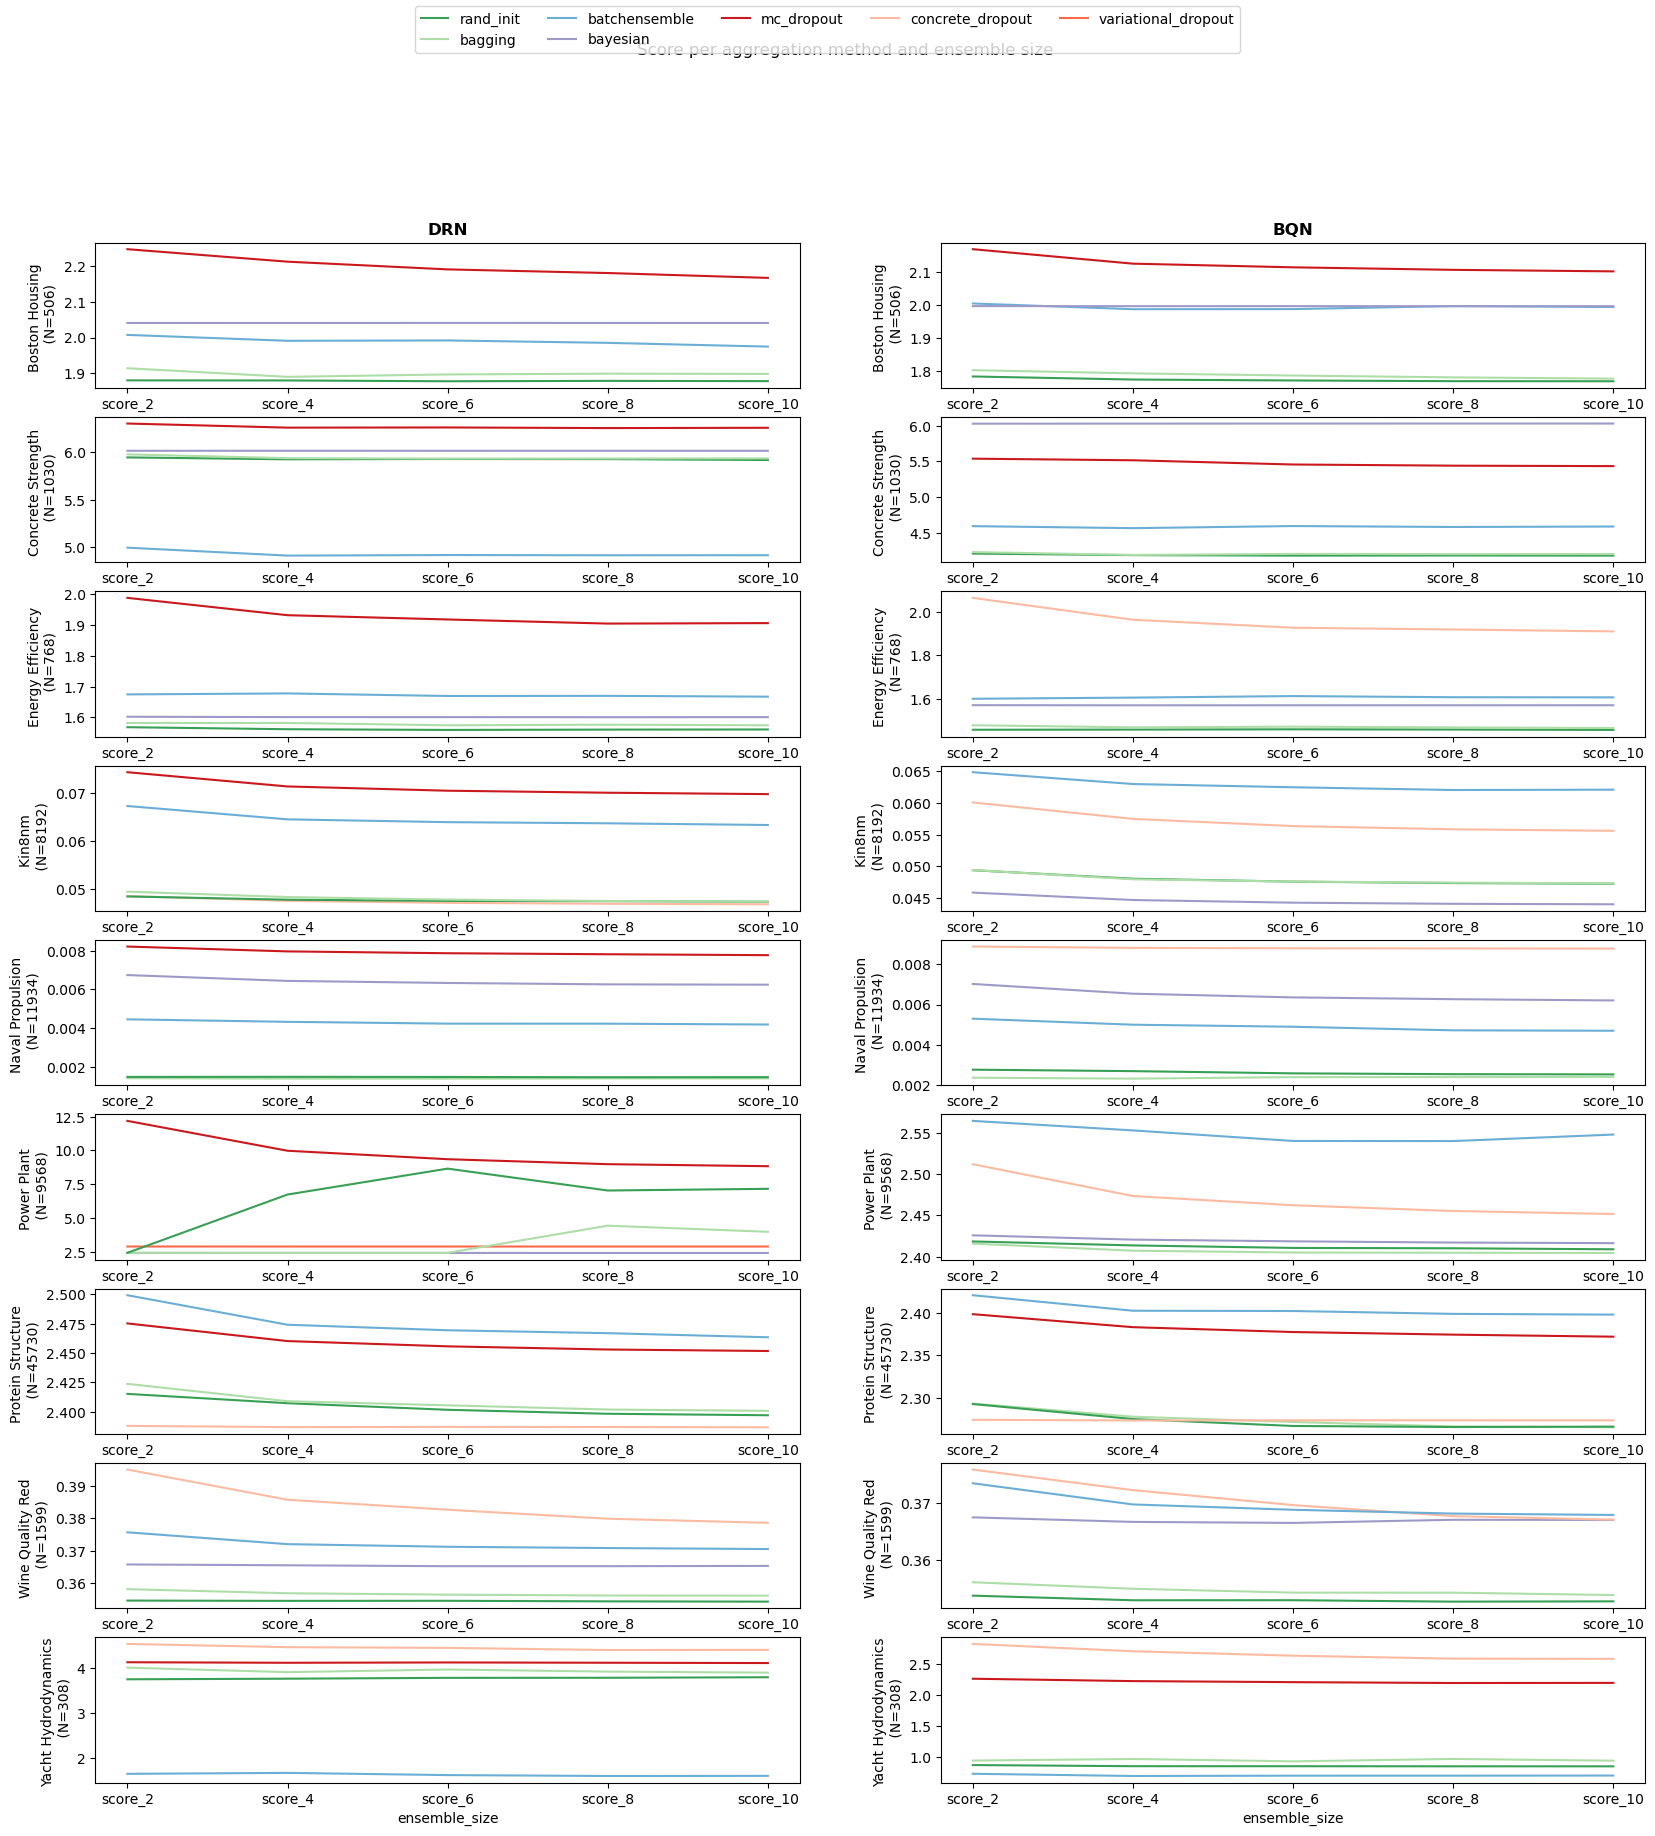

In [95]:
##### Score - Lineplot - x=ensemble_size #####

# Create subplots
fig, axs = plt.subplots(nrows=len(dataset_ls), ncols=len(nn_vec), figsize=(20,20), squeeze=False)

# Filter for specific aggregation method
df_agg = df_scores[df_scores["agg"] == agg_method_to_plot]
# Sort and select best k results
df_agg_top = df_agg.sort_values(["dataset", "nn", top_k_score], ascending=True).groupby(["dataset", "nn"]).head(top_k)

# Iterate over NN types and datasets
for i_nn, nn in enumerate(nn_vec):
    df_nn = df_agg_top[df_agg_top["nn"] == nn]
    for i_dataset, dataset in enumerate(dataset_ls):
        df_nn_dataset = df_nn[(df_nn["dataset"] == dataset)]
        # Melt dataframe for sns plots
        df_melt = pd.melt(df_nn_dataset, id_vars=["ens_method", "dataset", "nn", "agg"], var_name="ensemble_size", value_name="score")
        # Only use skills not differences
        df_final = df_melt[df_melt["ensemble_size"].isin([f"score_{n_ens}" for n_ens in n_ens_vec])]
        
        # Plot boxplots
        g = sns.lineplot(ax=axs[i_dataset][i_nn], data=df_final,
                 y="score", x="ensemble_size", hue="ens_method", palette=ens_col, estimator=None, errorbar=errors)
        # g = sns.lineplot(ax=axs[i_dataset][i_nn], data=df_final,
        #          y="score", x="ensemble_size", hue="agg", palette=agg_col, estimator="mean", errorbar=errors, linestyle="solid")
        
        # Add 0 line
        # g.axhline(0, linestyle="--", color=kit_cols_dict["blue"])
        # Add labels to y axis
        axs[i_dataset][i_nn].set_ylabel(dataset_labels[dataset])

# Remove subplot legends and add figure legend
for ax in [item for sublist in axs for item in sublist]:
    ax.legend([],[], frameon=False)

# Merge subplot legends and displaz figure legend
handles = []
labels = []
for ax in [item for sublist in axs for item in sublist]:
    curr_handles, curr_labels = ax.get_legend_handles_labels()
    for idx, check_label in enumerate(curr_labels):
        if check_label not in labels:
            handles.append(curr_handles[idx])
            labels.append(curr_labels[idx])
    ax.legend([],[], frameon=False)
fig.legend(handles, labels, loc='upper center', ncol=len(agg_meths))

# Set titles and legends
axs[0][0].set_title("DRN", fontweight="bold")
axs[0][1].set_title("BQN", fontweight="bold")
fig.suptitle(f"Score per aggregation method and ensemble size")


# Save figure
# if export:
#     filename=os.path.join(save_dir, "01_score_lineplot.pdf")
#     fig.savefig(filename, bbox_inches='tight')
#     filename=os.path.join(save_dir, "01_score_lineplot.png")
#     fig.savefig(filename, bbox_inches='tight')

In [13]:
df_scores["change"] = (df_scores["score_10"] - df_scores["score_2"]) / df_scores["score_2"] * 100
df_scores

ens_method dataset   nn    agg   score_2   score_4   score_6  \
0           rand_init  boston  drn     lp  1.880196  1.882215  1.874762   
1           rand_init  boston  drn     vi  1.880447  1.880195  1.877956   
2           rand_init  boston  drn   vi-a  1.894677  1.895243  1.893030   
3           rand_init  boston  drn   vi-w  1.896980  1.897274  1.895165   
4           rand_init  boston  drn  vi-aw  1.901667  1.902644  1.901496   
..                ...     ...  ...    ...       ...       ...       ...   
625  concrete_dropout   yacht  bqn     lp  2.838856  2.746799  2.693349   
626  concrete_dropout   yacht  bqn     vi  2.832418  2.713294  2.641648   
627  concrete_dropout   yacht  bqn   vi-a  2.843921  2.724507  2.648134   
628  concrete_dropout   yacht  bqn   vi-w  2.822318  2.674681  2.612777   
629  concrete_dropout   yacht  bqn  vi-aw  2.811190  2.638940  2.578053   

      score_8  score_10  avg_score     change  
0    1.884769  1.880862   1.880561   0.035460  
1    1.879042  1.878322   1.879192  -0.113019  
2    1.893910  1.893242   1.894020  -0.075741  
3    1.896109  1.895413   1.896188  -0.082642  
4    1.902405  1.901480   1.901939  -0.009813  
..        ...       ...        ...        ...  
625  2.674734  2.646699   2.720087  -6.768828  
626  2.593826  2.590692   2.674375  -8.534262  
627  2.601326  2.600102   2.683598  -8.573335  
628  2.556476  2.554257   2.644102  -9.497896  
629  2.516266  2.519275   2.612744 -10.384041  

[630 rows x 11 columns]

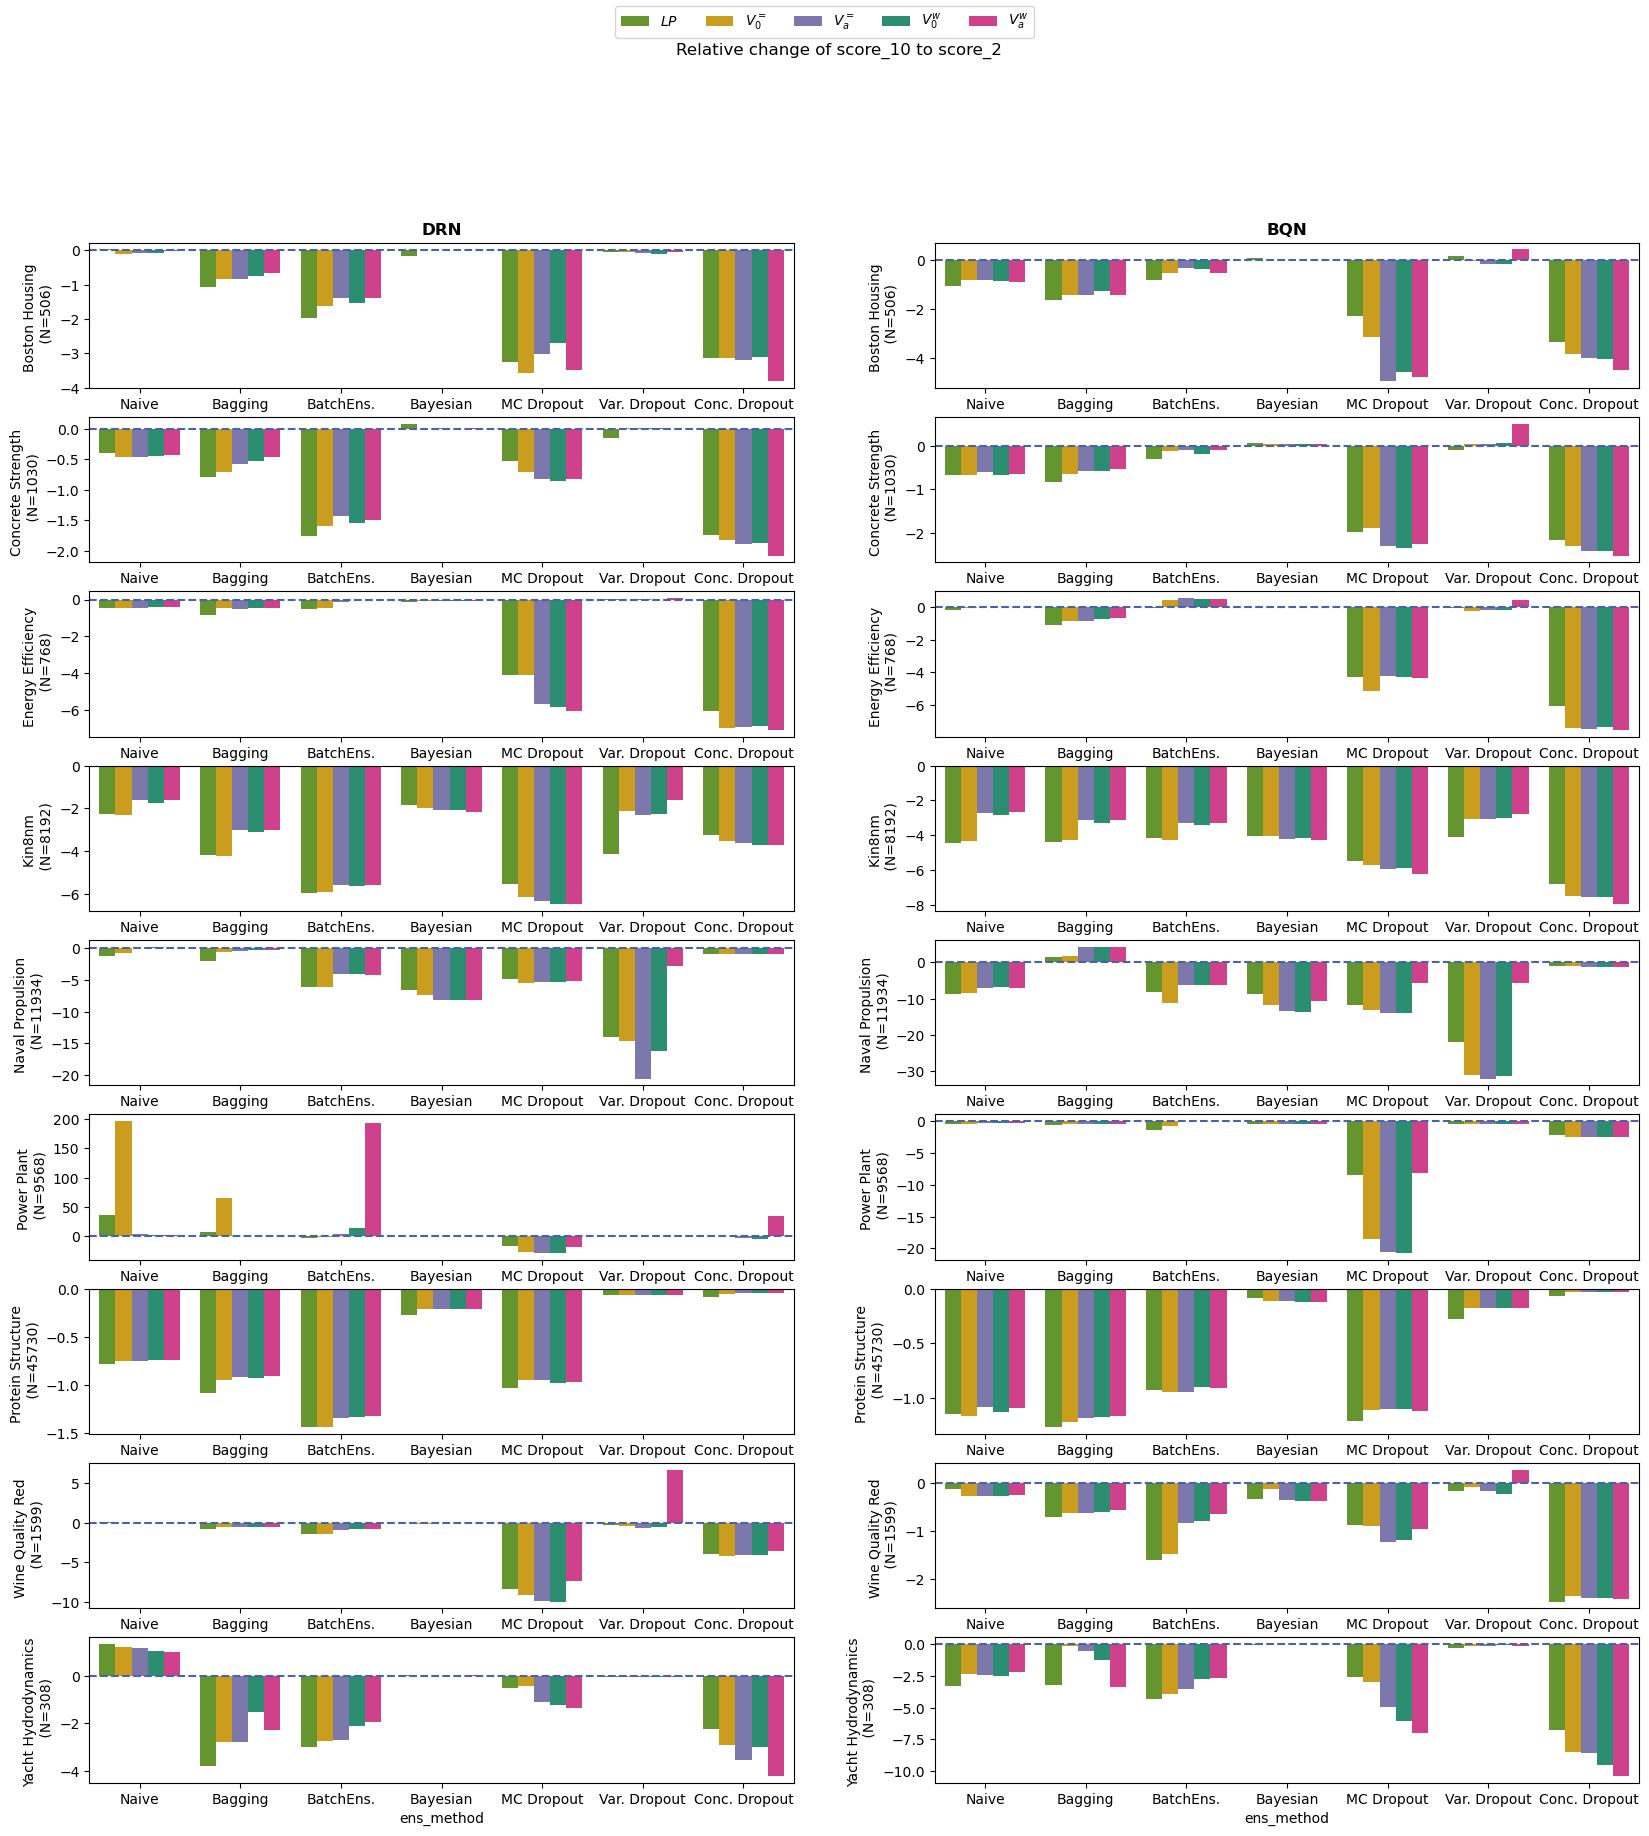

In [16]:
##### Score - Barplot - x=ensemble_method #####

# Create subplots
fig, axs = plt.subplots(nrows=len(dataset_ls), ncols=len(nn_vec), figsize=(20,20), squeeze=False)

# Iterate over NN types and datasets
for i_nn, nn in enumerate(nn_vec):
    df_nn = df_scores[df_scores["nn"] == nn]
    for i_dataset, dataset in enumerate(dataset_ls):
        df_nn_dataset = df_nn[(df_nn["dataset"] == dataset)]
        # Melt dataframe for sns plots
        # df_melt = pd.melt(df_nn_dataset, id_vars=["ens_method", "dataset", "nn", "agg"], var_name="ensemble_size", value_name="score")
        # Only use skills not differences
        # df_final = df_melt[df_melt["ensemble_size"].isin([f"score_{n_ens}" for n_ens in n_ens_vec])]
        
        # Plot boxplots
        g = sns.barplot(ax=axs[i_dataset][i_nn], data=df_nn_dataset,
                 y="change", x="ens_method", hue="agg", palette=agg_col)
        # g = sns.lineplot(ax=axs[i_dataset][i_nn], data=df_final,
        #          y="score", x="ensemble_size", hue="agg", palette=agg_col, estimator="mean", errorbar=errors, linestyle="solid")
        
        # Add 0 line
        g.axhline(0, linestyle="--", color=kit_cols_dict["blue"])
        # Add labels to y axis
        axs[i_dataset][i_nn].set_ylabel(dataset_labels[dataset])
        axs[i_dataset][i_nn].set_xticklabels([ens_method_labels.get(column_name) for column_name in ens_method_ls])

# Remove subplot legends and add figure legend
for ax in [item for sublist in axs for item in sublist]:
    ax.legend([],[], frameon=False)

# Merge subplot legends and displaz figure legend
handles = []
labels = []
for ax in [item for sublist in axs for item in sublist]:
    curr_handles, curr_labels = ax.get_legend_handles_labels()
    for idx, check_label in enumerate(curr_labels):
        if check_label not in labels:
            handles.append(curr_handles[idx])
            labels.append(curr_labels[idx])
    ax.legend([],[], frameon=False)
fig.legend(handles, [agg_labels.get(agg) for agg in labels], loc='upper center', ncol=len(agg_meths))

# Set titles and legends
axs[0][0].set_title("DRN", fontweight="bold")
axs[0][1].set_title("BQN", fontweight="bold")
fig.suptitle(f"Relative change of score_10 to score_2")


# Save figure
# if export:
#     filename=os.path.join(save_dir, "01_score_barplot_change.pdf")
#     fig.savefig(filename, bbox_inches='tight')
#     filename=os.path.join(save_dir, "01_score_barplot_change.png")
#     fig.savefig(filename, bbox_inches='tight')